# Dectecteur Emotion

L'objectif est qu'à partir de données textuelles, je classifie l'émotion du texte

pour ce faire, nous utiliseras go/emotions : https://www.kaggle.com/datasets/shivamb/go-emotions-google-emotions-dataset?resource=download

In [13]:
import pandas as pd

# Charger le dataset
df = pd.read_csv('../data/emotion_datasets/go_emotions_dataset.csv')

# Aperçu
print("Shape:", df.shape)
df.head()


Shape: (211225, 31)


,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,eew5j0j,That game hurt.,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,eemcysk,>sexuality shouldn’t be a grouping category I...,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ed2mah1,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,eeibobj,Man I love reddit.,False,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [2]:
print("Colonnes disponibles :")
print(df.columns)

print("\nTypes de données :")
print(df.dtypes)

Colonnes disponibles :
Index(['id', 'text', 'example_very_unclear', 'admiration', 'amusement',
       'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity',
       'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment',
       'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love',
       'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
       'sadness', 'surprise', 'neutral'],
      dtype='object')

Types de données :
id                      object
text                    object
example_very_unclear      bool
admiration               int64
amusement                int64
anger                    int64
annoyance                int64
approval                 int64
caring                   int64
confusion                int64
curiosity                int64
desire                   int64
disappointment           int64
disapproval              int64
disgust                  int64
embarrassment            int64
excitement               

In [14]:
# Longueur moyenne des textes
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
print("Longueur moyenne des textes :", df['text_length'].mean())

# Nombre de valeurs uniques par colonne (si pertinent)
print("\nValeurs uniques par colonne :")
print(df.nunique())


Longueur moyenne des textes : 12.99718783287963

Valeurs uniques par colonne :
id                      58011
text                    57732
example_very_unclear        2
admiration                  2
amusement                   2
anger                       2
annoyance                   2
approval                    2
caring                      2
confusion                   2
curiosity                   2
desire                      2
disappointment              2
disapproval                 2
disgust                     2
embarrassment               2
excitement                  2
fear                        2
gratitude                   2
grief                       2
joy                         2
love                        2
nervousness                 2
optimism                    2
pride                       2
realization                 2
relief                      2
remorse                     2
sadness                     2
surprise                    2
neutral              

### Analyse des étiquettes

Nombre de labels : 30

Distribution des émotions :
text_length             2745331
neutral                   55298
approval                  17620
admiration                17131
annoyance                 13618
gratitude                 11625
disapproval               11424
curiosity                  9692
amusement                  9245
realization                8785
optimism                   8715
disappointment             8469
love                       8191
anger                      8084
joy                        7983
confusion                  7359
sadness                    6758
caring                     5999
excitement                 5629
surprise                   5514
disgust                    5301
desire                     3817
example_very_unclear       3411
fear                       3197
remorse                    2525
embarrassment              2476
nervousness                1810
pride                      1302
relief                     1289
grief                

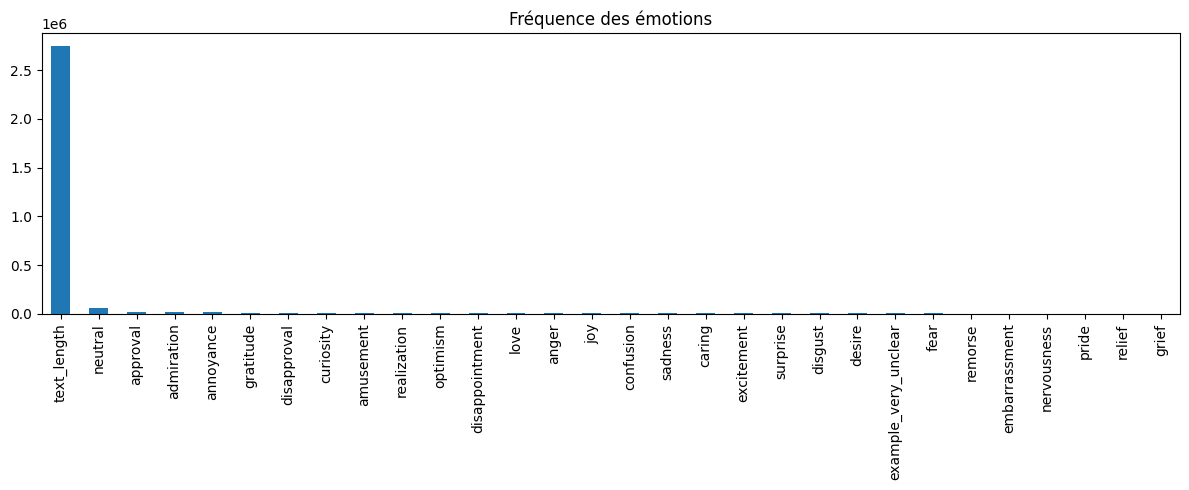

In [15]:
label_cols = [col for col in df.columns if col not in ['text', 'id']]  # ajuste selon les vraies colonnes
print("Nombre de labels :", len(label_cols))

# Fréquence des émotions
emotion_counts = df[label_cols].sum().sort_values(ascending=False)
print("\nDistribution des émotions :")
print(emotion_counts)

# Affichage graphique
import matplotlib.pyplot as plt

emotion_counts.plot(kind='bar', figsize=(12,5), title="Fréquence des émotions")
plt.tight_layout()
plt.show()


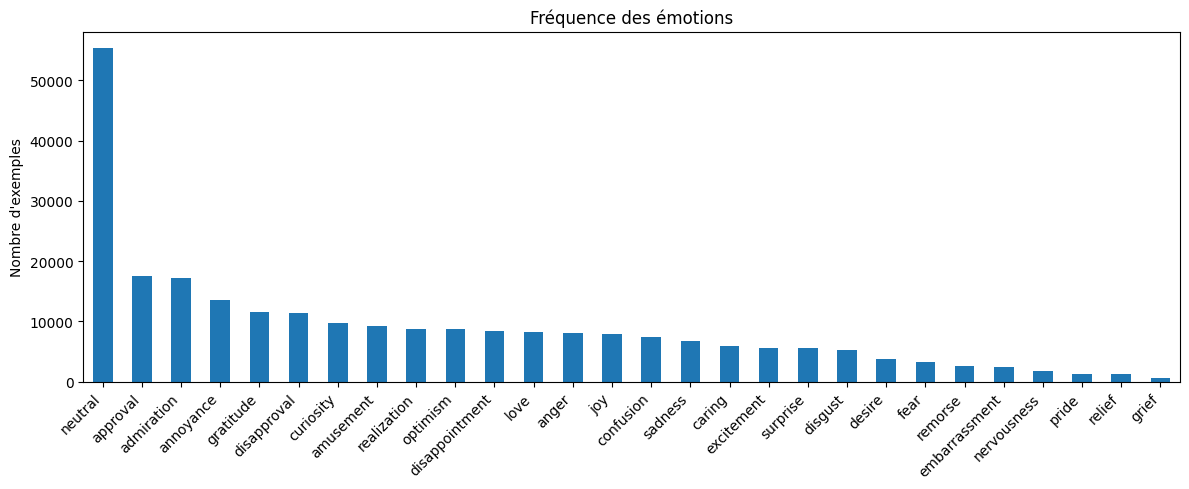

In [16]:
import matplotlib.pyplot as plt

label_cols = [col for col in df.columns if col not in ['id', 'text', 'example_very_unclear', 'text_length']]
emotion_counts = df[label_cols].sum().sort_values(ascending=False)

emotion_counts.plot(kind='bar', figsize=(12,5), title="Fréquence des émotions")
plt.ylabel("Nombre d'exemples")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [17]:
df['num_labels'] = df[label_cols].sum(axis=1)

print("Nombre moyen d'émotions par texte :", df['num_labels'].mean())
df['num_labels'].value_counts().sort_index()


Nombre moyen d'émotions par texte : 1.1813421706710854


num_labels
0       3411
1     171820
2      31187
3       4218
4        399
5        106
6         53
7         20
8          6
9          3
10         1
12         1
Name: count, dtype: int64

In [18]:
multi_label_df = df[df['num_labels'] > 1]
multi_label_df[['text', 'num_labels'] + label_cols].head()


,text,num_labels,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
13,That is odd.,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,"I appreciate it, that's good to know. I hope I...",2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,Now I'm wondering on what I've been missing ou...,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29,So happy for [NAME]. So sad he's not here. Ima...,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32,"Dark and funny, but not really nice guy. He ha...",2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Corrélations entre émotions 

In [8]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


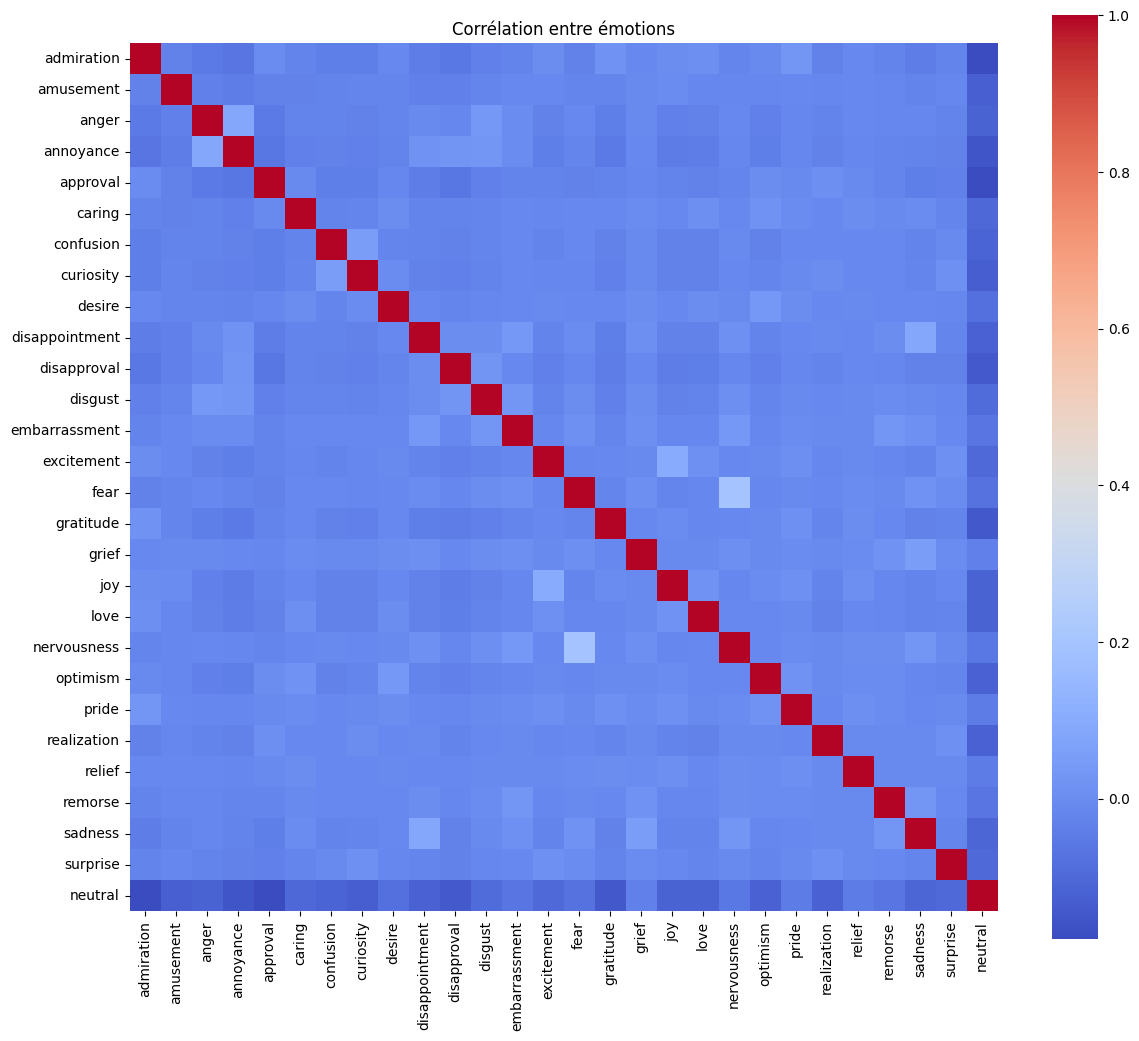

In [8]:
import seaborn as sns

# Matrice de corrélation entre émotions
correlation_matrix = df[label_cols].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", square=True)
plt.title("Corrélation entre émotions")
plt.show()


### Analyse rare et fréquent

In [9]:
print("Exemples de textes avec 'neutral' :")
print(df[df['neutral'] == 1]['text'].sample(5).values)

print("\nExemples avec 'grief' :")
print(df[df['grief'] == 1]['text'].sample(5).values)


Exemples de textes avec 'neutral' :
['Man people say baseball is dragged out but football is realllyyyy dragged out'
 'Well this beats the whole "[NAME] tried to convince the front office to take [NAME] at 1" narrative'
 'No, but I might choose to not support certain teams because their owners are trash.'
 '[NAME] is clearly our 5th best player'
 'No since parries read the heavy press, not the release.']

Exemples avec 'grief' :
["I dread the day something happens in Ireland, we've been sheltered from the most of it."
 'The day I get the phone call: "your Nmom/Ndad/Nbrother have passed away." "Fuuuuuuuuuuucking ***FINALLY***"'
 'Dude, she had just lost her baby, too. '
 'I tell them my wife died in a car accident 10 years ago and I couldn’t fall in love again. I’ve never been married.'
 "Honestly at this point I don't think there's anything that will make me feel better. Maybe down the road, but right now nothing is helping. "]


### longueur texte par émotion 

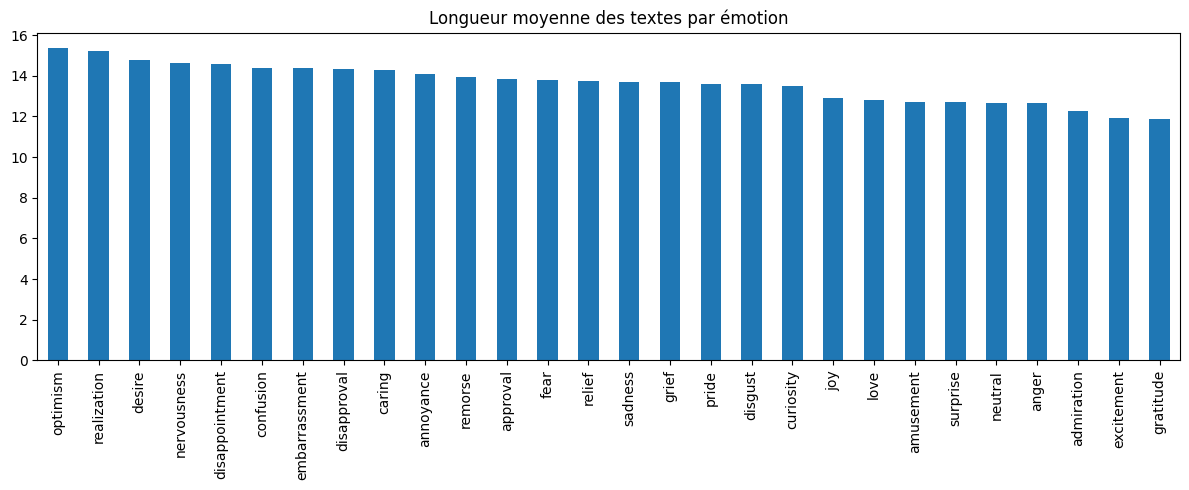

In [10]:
import numpy as np

emotion_lengths = {
    emotion: df[df[emotion] == 1]['text_length'].mean() 
    for emotion in label_cols
}

pd.Series(emotion_lengths).sort_values(ascending=False).plot(kind='bar', figsize=(12,5), title="Longueur moyenne des textes par émotion")
plt.tight_layout()
plt.show()


###  Analyse Exploratoire du Dataset GoEmotions

---

####  1. Structure générale du dataset

- **58 000+ exemples**
- Colonnes principales :
  - `id` (identifiant)
  - `text` (texte du commentaire)
  - `example_very_unclear` (booléen)
  - **30 colonnes binaires** représentant les émotions (`int64`, 0 ou 1)
    - 27 émotions
    - + `neutral`
    - + autres (`example_very_unclear`)

>  **Format multi-label**, chaque exemple peut avoir plusieurs émotions.

---

####  2. Distribution des émotions (fort déséquilibre)

- `neutral` domine largement (**55 298 exemples**)
- Classes fréquentes : `approval`, `admiration`, `gratitude`
- Classes très rares :
  - `grief` (~673)
  - `relief`, `pride`, `nervousness`... (< 2000 exemples)

#####  Implications :
- **Risque de surapprentissage** sur les classes fréquentes
- Besoin probable de :
  - techniques d’**oversampling/undersampling**
  - **pénalisation des classes majoritaires** (`class_weight`, `focal loss`)
  - ou **fusion de certaines classes** si pertinent

---

####  3. Nombre d’étiquettes par texte

- **Moyenne** : ~1.18 émotions/texte
- **170 000 exemples** avec **1 seule étiquette**
- Quelques cas extrêmes : jusqu’à **12 émotions** par texte

#####  Implications :
- Dataset **majoritairement mono-label**
- Tu peux entraîner :
  - Un **modèle mono-label simplifié**
  - Et un **modèle multi-label plus réaliste**

---

####  4. Corrélation entre émotions

- Heatmap = **peu de corrélations fortes globales**
- Quelques cooccurrences naturelles :
  - `admiration` ↔ `gratitude`
  - `disapproval` ↔ `anger`
  - `realization` ↔ `optimism`

#####  Implications :
- Ces associations peuvent être exploitées via :
  - **loss pondérée** (pondérer les erreurs entre émotions proches)
  - **modèle hiérarchique ou graphe de labels**

---

####  5. Longueur moyenne des textes par émotion

- **Longueur moyenne** : ~13 tokens
- Les textes les **plus longs** expriment :
  - `optimism`, `realization`, `desire`
- Les **plus courts** :
  - `gratitude`, `excitement`, `anger`, `neutral`

#####  Implications :
- Les émotions **cognitives ou complexes** nécessitent plus de contexte
- À envisager :
  - **Normalisation de longueur** (padding/troncature)
  - Étude de l'impact de la longueur sur la performance

---

####  Synthèse des forces et problèmes potentiels

| Élément                   | Observation                       | Conséquence                                      |
|---------------------------|-----------------------------------|--------------------------------------------------|
| Format multi-label        | ✅ OK                              | Doit être traité avec **sigmoid** (pas softmax) |
| Déséquilibre des classes  | ❗ Fort                            | Adapter la loss (focal, class weights...)        |
| Étiquettes par texte      | Souvent 1                         | Benchmark mono-label vs. multi-label             |
| Corrélations faibles      | Majoritairement indépendantes     | Potentiel pour graphe ou multi-task              |
| Longueurs des textes      | Variées selon l’émotion           | Adapter tokenizer et **max_length**              |

---


# Traitement des données

In [20]:
# Supprimer les exemples très flous
df_clean = df[(df['example_very_unclear'] == False) & (df['num_labels'] > 0)].copy()

print("Taille du dataset après nettoyage :", df_clean.shape)


Taille du dataset après nettoyage : (207814, 33)


###   Séparation des données

In [13]:
!pip install scikit-learn

In [21]:
from sklearn.model_selection import train_test_split
df_stratifiable = df_clean[df_clean['num_labels'] <= 7].copy()

# Vérification
print(df_stratifiable['num_labels'].value_counts())

# Split maintenant OK avec stratify
df_train, df_temp = train_test_split(df_stratifiable, test_size=0.2, random_state=42, stratify=df_stratifiable['num_labels'])
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42, stratify=df_temp['num_labels'])

print("Train :", df_train.shape)
print("Val :", df_val.shape)
print("Test :", df_test.shape)



num_labels
1    171820
2     31187
3      4218
4       399
5       106
6        53
7        20
Name: count, dtype: int64
Train : (166242, 33)
Val : (20780, 33)
Test : (20781, 33)


### Préparer les features et labels

In [22]:
label_cols = [col for col in df.columns if col not in ['id', 'text', 'example_very_unclear', 'num_labels', 'text_length']]

# X = textes, y = labels binaires
X_train = df_train['text'].tolist()
y_train = df_train[label_cols].values

X_val = df_val['text'].tolist()
y_val = df_val[label_cols].values

X_test = df_test['text'].tolist()
y_test = df_test[label_cols].values


####  Analyse des poids de classes

In [14]:
import numpy as np

# Fréquence inverse pour class weighting
class_weights = np.sum(y_train, axis=0)
class_weights = 1 / np.log1p(class_weights)  # ou 1/class_freq

# Affichage
for label, weight in zip(label_cols, class_weights):
    print(f"{label}: {weight:.3f}")


admiration: 0.105
amusement: 0.112
anger: 0.114
annoyance: 0.108
approval: 0.105
caring: 0.118
confusion: 0.115
curiosity: 0.112
desire: 0.125
disappointment: 0.113
disapproval: 0.110
disgust: 0.120
embarrassment: 0.132
excitement: 0.119
fear: 0.127
gratitude: 0.110
grief: 0.159
joy: 0.114
love: 0.114
nervousness: 0.138
optimism: 0.113
pride: 0.144
realization: 0.113
relief: 0.144
remorse: 0.132
sadness: 0.116
surprise: 0.119
neutral: 0.093


# Modélisation

## TF IDF + regression logistique

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Limite à 10k tokens max pour éviter surdimension
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

print("Dimensions TF-IDF :", X_train_tfidf.shape)


Dimensions TF-IDF : (166242, 10000)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier


lr = LogisticRegression(solver='liblinear')
clf = OneVsRestClassifier(lr)

clf.fit(X_train_tfidf, y_train)


,estimator,LogisticRegre...r='liblinear')
,n_jobs,None
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None


In [22]:
from sklearn.metrics import classification_report, f1_score, hamming_loss

y_val_pred = clf.predict(X_val_tfidf)

print("F1 micro :", f1_score(y_val, y_val_pred, average='micro'))
print("F1 macro :", f1_score(y_val, y_val_pred, average='macro'))
print("Hamming loss :", hamming_loss(y_val, y_val_pred))

# Rapport détaillé
print(classification_report(y_val, y_val_pred, target_names=label_cols))


F1 micro : 0.23770491803278687
F1 macro : 0.1698538763928398
Hamming loss : 0.03995943902103671
                precision    recall  f1-score   support

    admiration       0.67      0.27      0.38      1691
     amusement       0.61      0.27      0.37       926
         anger       0.59      0.11      0.18       861
     annoyance       0.37      0.02      0.04      1353
      approval       0.54      0.03      0.06      1794
        caring       0.50      0.03      0.06       577
     confusion       0.66      0.05      0.10       721
     curiosity       0.90      0.04      0.07       947
        desire       0.50      0.07      0.13       361
disappointment       0.61      0.02      0.05       849
   disapproval       0.40      0.01      0.02      1184
       disgust       0.63      0.08      0.14       550
 embarrassment       0.58      0.03      0.05       264
    excitement       0.70      0.06      0.12       553
          fear       0.65      0.16      0.26       318
     gr

c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


###  Analyse des Résultats - TF-IDF + Logistic Regression

---

#### Résultats globaux

| Indicateur       | Valeur    | Interprétation |
|------------------|-----------|----------------|
| **F1 micro**     | `0.2377`  | Mesure globale sur toutes les émotions, pondérée par fréquence. Correct mais peu discriminant. |
| **F1 macro**     | `0.1698`  | Moyenne simple des F1-score pour chaque émotion. Indique que les classes rares sont très mal prédites. |
| **Hamming Loss** | `0.0399`  | En moyenne, 3.99% des labels sont mal prédits par exemple. Plus c’est bas, mieux c’est. |

---

####  Performances par émotion

#####  Bonnes performances (précision + rappel équilibrés)

| Émotion      | F1-score | Remarques |
|--------------|----------|-----------|
| `gratitude`  | 0.80     | Très bon — émotion claire et bien représentée |
| `love`       | 0.50     | Moyenne correcte — souvent détectée correctement |
| `joy`        | 0.18     | Faible mais attendue pour une émotion plus diffuse |

---

#####  Faibles performances (émotions ignorées ou difficiles)

| Émotion         | F1-score | Remarques |
|-----------------|----------|-----------|
| `grief`         | 0.00     | Trop peu d’exemples pour apprendre correctement |
| `disapproval`   | 0.02     | Mauvais rappel malgré une fréquence modérée |
| `desire`        | 0.13     | Mal capturée, probablement trop abstraite pour TF-IDF |

---

####  Analyse qualitative

- Le modèle **sous-prédit beaucoup** → rappel très bas
- Les émotions les plus simples ou avec des **mots clés explicites** sont mieux détectées (`gratitude`, `excitement`, etc.)
- Les émotions **complexes ou peu fréquentes** sont souvent ignorées

> Le F1-macro très bas montre que le modèle ne généralise pas bien à toutes les classes.

---

####  Limites du modèle

- **TF-IDF** ne capture pas le sens ni le contexte grammatical
- **LogisticRegression (OneVsRest)** ne partage pas d'information entre classes
- Modèle **très sensible au déséquilibre** entre les classes

---

## Autres modèles classifiers

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

# Initialiser un modèle de forêt aléatoire
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Wrapping en OneVsRest pour le multi-label
clf_rf = OneVsRestClassifier(rf)

# Entraînement
clf_rf.fit(X_train_tfidf, y_train)

# Prédictions
y_val_pred_rf = clf_rf.predict(X_val_tfidf)


In [29]:
from sklearn.metrics import f1_score, classification_report, hamming_loss

print("F1 micro :", f1_score(y_val, y_val_pred_rf, average='micro'))
print("F1 macro :", f1_score(y_val, y_val_pred_rf, average='macro'))
print("Hamming loss :", hamming_loss(y_val, y_val_pred_rf))

print("\nRapport par classe :")
print(classification_report(y_val, y_val_pred_rf, target_names=label_cols))


F1 micro : 0.3515952143569292
F1 macro : 0.27622241218604354
Hamming loss : 0.04470988587927953

Rapport par classe :
                precision    recall  f1-score   support

    admiration       0.56      0.42      0.48      1691
     amusement       0.54      0.46      0.49       926
         anger       0.44      0.23      0.30       861
     annoyance       0.24      0.11      0.16      1353
      approval       0.32      0.13      0.19      1794
        caring       0.28      0.13      0.18       577
     confusion       0.34      0.17      0.23       721
     curiosity       0.38      0.22      0.28       947
        desire       0.31      0.15      0.20       361
disappointment       0.25      0.12      0.16       849
   disapproval       0.30      0.14      0.19      1184
       disgust       0.38      0.17      0.24       550
 embarrassment       0.26      0.11      0.15       264
    excitement       0.35      0.14      0.20       553
          fear       0.50      0.29      

c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


###   Alternatives à TF-IDF pour la Vectorisation de Texte

---

####  🔹 1. Bag-of-Words (BoW)

📌 **Description**  
Simple comptage d’occurrences des mots  
Pas de pondération (contrairement au TF-IDF)


from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=10000, ngram_range=(1,2), stop_words='english')
X = vectorizer.fit_transform(X_train)

 Simple
 Ne tient pas compte de l’importance relative des mots

####   🔹 2. Word Embeddings Moyennés
📌 Description
Moyenne des vecteurs de mots pré-entraînés (ex: GloVe, FastText, Word2Vec)

import numpy as np
import gensim.downloader as api

#####   Charger un modèle GloVe ou FastText
glove = api.load("glove-wiki-gigaword-100")  # 100 dimensions

def vectorize_avg(text):
    words = text.lower().split()
    vectors = [glove[word] for word in words if word in glove]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

X_train_embed = np.array([vectorize_avg(t) for t in X_train])
✅ Vecteurs denses, conserve un peu de sens
❌ Perte de l’ordre, dépend du modèle choisi

####  3. Doc2Vec (gensim)
📌 Description
Crée un vecteur de document entier, entraîné sur le corpus
Basé sur Word2Vec + contexte global

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tagged_docs = [TaggedDocument(words=text.lower().split(), tags=[i]) for i, text in enumerate(X_train)]
model = Doc2Vec(tagged_docs, vector_size=100, epochs=20)

X_train_vec = np.array([model.infer_vector(t.words) for t in tagged_docs])
✅ Encode mieux le contexte document
❌ Long à entraîner, dépend du volume

####  🔹 4. Sentence Embeddings (BERT-like)
📌 Description
Utilise des modèles de type Sentence-BERT ou USE pour obtenir un vecteur sémantique dense du texte entier

Exemple avec Sentence-BERT :

from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
X_train_sbert = model.encode(X_train, show_progress_bar=True)
✅ Très puissant pour la sémantique
✅ Fonctionne bien en downstream task (multi-label)
❌ Plus lent et demande des ressources

#### 🔹 5. Transformer Fine-Tuning (End-to-End)
📌 Description
Pas une "vectorisation" mais plutôt un fine-tuning complet
On entraîne le modèle comme un classifieur

from transformers import AutoTokenizer, AutoModelForSequenceClassification
#####  Exemple : "roberta-base" ou "distilbert-base-uncased"
 Meilleures performances globales
 Nécessite GPU pour entraînement efficace

#### 🧪 Comparatif résumé

| Méthode                  | Dense ? | Sémantique ? | Ordre ? | Performance |
|--------------------------|---------|--------------|---------|-------------|
| **BoW / TF-IDF**         | ❌       | ❌            | ❌       | Moyen        |
| **Embeddings Moyens**    | ✅       | 🟡            | ❌       | Moyen+       |
| **Doc2Vec**              | ✅       | ✅            | ✅       | Bon          |
| **Sentence-BERT / USE**  | ✅       | ✅✅           | ✅       | Très bon     |
| **Transformer Fine-Tune**| ✅       | ✅✅✅          | ✅       | Excellent    |


# Véctorization + Transformers léger

Objectif : capturer plus de sens, sans faire du finetuning

## Récupération du jeu de données

In [23]:
label_cols = [col for col in df.columns if col not in ['id', 'text', 'example_very_unclear', 'num_labels', 'text_length']]

X_train = df_train['text'].tolist()
y_train = df_train[label_cols].values

X_val = df_val['text'].tolist()
y_val = df_val[label_cols].values

X_test = df_test['text'].tolist()
y_test = df_test[label_cols].values


### remarques

Sentence-BERT = BERT + pooling → encoder de manière sémantique le texte entier.
Il doit recevoir le texte brut, tel qu’il est écrit, pour fonctionner comme prévu.

si je fais du nettoyage comme je l'ai pour TF-IDF, je risque de dégrader ses performances.

In [19]:
!pip install transformers
!pip install sentence-transformers


  Using cached sentence_transformers-5.0.0-py3-none-any.whl.metadata (16 kB)
Using cached sentence_transformers-5.0.0-py3-none-any.whl (470 kB)


### Vectorizaition via transformers

In [17]:
from sentence_transformers import SentenceTransformer

# Charger un modèle rapide et performant
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')  # 384 dimensions

# Encoder les textes (⚠️ ça peut prendre quelques minutes)
X_train_sbert = sbert_model.encode(X_train, show_progress_bar=True, batch_size=32)
X_val_sbert = sbert_model.encode(X_val, show_progress_bar=True, batch_size=32)
X_test_sbert = sbert_model.encode(X_test, show_progress_bar=True, batch_size=32)


Batches:   0%|          | 0/5196 [00:00<?, ?it/s]

Batches:   0%|          | 0/650 [00:00<?, ?it/s]

Batches:   0%|          | 0/650 [00:00<?, ?it/s]

### entrainement modele

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

lr = LogisticRegression(max_iter=1000)
clf_sbert = OneVsRestClassifier(lr)

clf_sbert.fit(X_train_sbert, y_train)


,estimator,LogisticRegre...max_iter=1000)
,n_jobs,None
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None


### évaluation



In [33]:
from sklearn.metrics import f1_score, classification_report, hamming_loss

y_val_pred_sbert = clf_sbert.predict(X_val_sbert)

print("F1 micro :", f1_score(y_val, y_val_pred_sbert, average='micro'))
print("F1 macro :", f1_score(y_val, y_val_pred_sbert, average='macro'))
print("Hamming loss :", hamming_loss(y_val, y_val_pred_sbert))

print("\nRapport détaillé par classe :")
print(classification_report(y_val, y_val_pred_sbert, target_names=label_cols))


F1 micro : 0.18433903630092546
F1 macro : 0.12375796103516999
Hamming loss : 0.04105080434483707

Rapport détaillé par classe :
                precision    recall  f1-score   support

    admiration       0.61      0.20      0.30      1691
     amusement       0.63      0.29      0.40       926
         anger       0.71      0.07      0.12       861
     annoyance       0.44      0.00      0.01      1353
      approval       0.58      0.01      0.02      1794
        caring       0.38      0.03      0.05       577
     confusion       0.52      0.02      0.03       721
     curiosity       0.43      0.03      0.06       947
        desire       0.46      0.03      0.06       361
disappointment       0.00      0.00      0.00       849
   disapproval       0.52      0.01      0.02      1184
       disgust       0.52      0.05      0.09       550
 embarrassment       0.33      0.00      0.01       264
    excitement       0.72      0.03      0.06       553
          fear       0.66      

c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


## modèles plus lourds sans fine tine : mpnet 

In [18]:
from sentence_transformers import SentenceTransformer

# Modèle puissant (768 dimensions)
sbert_model = SentenceTransformer('all-mpnet-base-v2')

# Encodage (attention : plus lent que MiniLM)
X_train_sbert = sbert_model.encode(X_train, show_progress_bar=True, batch_size=32)
X_val_sbert = sbert_model.encode(X_val, show_progress_bar=True, batch_size=32)
X_test_sbert = sbert_model.encode(X_test, show_progress_bar=True, batch_size=32)


Batches:   0%|          | 0/5196 [00:00<?, ?it/s]

Batches:   0%|          | 0/650 [00:00<?, ?it/s]

Batches:   0%|          | 0/650 [00:00<?, ?it/s]

### avec logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))
clf.fit(X_train_sbert, y_train)


,estimator,LogisticRegre...max_iter=1000)
,n_jobs,None
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None


In [36]:
from sklearn.metrics import f1_score, hamming_loss, classification_report

y_val_pred = clf.predict(X_val_sbert)

print("F1 micro :", f1_score(y_val, y_val_pred, average='micro'))
print("F1 macro :", f1_score(y_val, y_val_pred, average='macro'))
print("Hamming loss :", hamming_loss(y_val, y_val_pred))

print("\nClassification report:")
print(classification_report(y_val, y_val_pred, target_names=label_cols))


F1 micro : 0.17145418807545088
F1 macro : 0.11193620140416258
Hamming loss : 0.04129485769283652

Classification report:
                precision    recall  f1-score   support

    admiration       0.56      0.18      0.28      1691
     amusement       0.59      0.24      0.34       926
         anger       0.64      0.07      0.12       861
     annoyance       0.50      0.00      0.00      1353
      approval       0.55      0.01      0.02      1794
        caring       0.41      0.02      0.04       577
     confusion       0.37      0.01      0.02       721
     curiosity       0.38      0.02      0.04       947
        desire       0.41      0.03      0.06       361
disappointment       0.50      0.00      0.01       849
   disapproval       0.32      0.01      0.01      1184
       disgust       0.55      0.04      0.08       550
 embarrassment       0.67      0.01      0.01       264
    excitement       0.69      0.02      0.04       553
          fear       0.64      0.12   

c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### avec mlp classifier

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier

# Définir un MLP simple
mlp = MLPClassifier(hidden_layer_sizes=(256, 128), 
                    activation='relu', 
                    max_iter=20, 
                    random_state=42, 
                    verbose=True)

clf_mlp = OneVsRestClassifier(mlp)

# Entraîner sur les embeddings SBERT
clf_mlp.fit(X_train_sbert, y_train)


Iteration 1, loss = 0.21986692
Iteration 2, loss = 0.19305314
Iteration 3, loss = 0.17824142
Iteration 4, loss = 0.16471129
Iteration 5, loss = 0.15467911
Iteration 6, loss = 0.14669098
Iteration 7, loss = 0.13943275
Iteration 8, loss = 0.13369726
Iteration 9, loss = 0.12865318
Iteration 10, loss = 0.12350687
Iteration 11, loss = 0.11949993
Iteration 12, loss = 0.11643600
Iteration 13, loss = 0.11331633
Iteration 14, loss = 0.11076156
Iteration 15, loss = 0.10934652
Iteration 16, loss = 0.10726288
Iteration 17, loss = 0.10634303
Iteration 18, loss = 0.10477844
Iteration 19, loss = 0.10327573
Iteration 20, loss = 0.10274079


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.12599606
Iteration 2, loss = 0.10311343
Iteration 3, loss = 0.09457339
Iteration 4, loss = 0.08712915
Iteration 5, loss = 0.08078063
Iteration 6, loss = 0.07554254
Iteration 7, loss = 0.07154427
Iteration 8, loss = 0.06826224
Iteration 9, loss = 0.06548278
Iteration 10, loss = 0.06318733
Iteration 11, loss = 0.06140198
Iteration 12, loss = 0.06017107
Iteration 13, loss = 0.05899674
Iteration 14, loss = 0.05787746
Iteration 15, loss = 0.05764246
Iteration 16, loss = 0.05706182
Iteration 17, loss = 0.05579393
Iteration 18, loss = 0.05525192
Iteration 19, loss = 0.05450841
Iteration 20, loss = 0.05426705


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.14220202
Iteration 2, loss = 0.12456014
Iteration 3, loss = 0.11656936
Iteration 4, loss = 0.10790627
Iteration 5, loss = 0.10010375
Iteration 6, loss = 0.09336265
Iteration 7, loss = 0.08858336
Iteration 8, loss = 0.08356459
Iteration 9, loss = 0.07949730
Iteration 10, loss = 0.07604662
Iteration 11, loss = 0.07322515
Iteration 12, loss = 0.07111472
Iteration 13, loss = 0.06953017
Iteration 14, loss = 0.06815846
Iteration 15, loss = 0.06689049
Iteration 16, loss = 0.06627899
Iteration 17, loss = 0.06571420
Iteration 18, loss = 0.06483582
Iteration 19, loss = 0.06420318
Iteration 20, loss = 0.06382241


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.22484454
Iteration 2, loss = 0.21000523
Iteration 3, loss = 0.20194615
Iteration 4, loss = 0.19118952
Iteration 5, loss = 0.18036498
Iteration 6, loss = 0.17031885
Iteration 7, loss = 0.16249609
Iteration 8, loss = 0.15467265
Iteration 9, loss = 0.14807867
Iteration 10, loss = 0.14222257
Iteration 11, loss = 0.13715812
Iteration 12, loss = 0.13267870
Iteration 13, loss = 0.13049360
Iteration 14, loss = 0.12798267
Iteration 15, loss = 0.12625500
Iteration 16, loss = 0.12489548
Iteration 17, loss = 0.12339525
Iteration 18, loss = 0.12248488
Iteration 19, loss = 0.12163333
Iteration 20, loss = 0.12077859


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.28106834
Iteration 2, loss = 0.26721938
Iteration 3, loss = 0.25799075
Iteration 4, loss = 0.24541936
Iteration 5, loss = 0.23291305
Iteration 6, loss = 0.22204109
Iteration 7, loss = 0.21304375
Iteration 8, loss = 0.20522299
Iteration 9, loss = 0.19819914
Iteration 10, loss = 0.19127076
Iteration 11, loss = 0.18524697
Iteration 12, loss = 0.17940470
Iteration 13, loss = 0.17397063
Iteration 14, loss = 0.16970803
Iteration 15, loss = 0.16580636
Iteration 16, loss = 0.16275250
Iteration 17, loss = 0.16005243
Iteration 18, loss = 0.15919306
Iteration 19, loss = 0.15672173
Iteration 20, loss = 0.15579056


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.11658256
Iteration 2, loss = 0.10127100
Iteration 3, loss = 0.09525753
Iteration 4, loss = 0.08832716
Iteration 5, loss = 0.08178068
Iteration 6, loss = 0.07587272
Iteration 7, loss = 0.07099567
Iteration 8, loss = 0.06646199
Iteration 9, loss = 0.06274055
Iteration 10, loss = 0.05954075
Iteration 11, loss = 0.05740272
Iteration 12, loss = 0.05629848
Iteration 13, loss = 0.05501615
Iteration 14, loss = 0.05428924
Iteration 15, loss = 0.05364764
Iteration 16, loss = 0.05294039
Iteration 17, loss = 0.05282167
Iteration 18, loss = 0.05208909
Iteration 19, loss = 0.05213623
Iteration 20, loss = 0.05154515


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.14070392
Iteration 2, loss = 0.12460201
Iteration 3, loss = 0.11570904
Iteration 4, loss = 0.10573691
Iteration 5, loss = 0.09752443
Iteration 6, loss = 0.09094967
Iteration 7, loss = 0.08545545
Iteration 8, loss = 0.08046631
Iteration 9, loss = 0.07570058
Iteration 10, loss = 0.07249880
Iteration 11, loss = 0.06946358
Iteration 12, loss = 0.06774599
Iteration 13, loss = 0.06580001
Iteration 14, loss = 0.06485614
Iteration 15, loss = 0.06377250
Iteration 16, loss = 0.06366162
Iteration 17, loss = 0.06225785
Iteration 18, loss = 0.06229789
Iteration 19, loss = 0.06193088
Iteration 20, loss = 0.06129057


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.16380833
Iteration 2, loss = 0.14141260
Iteration 3, loss = 0.12780949
Iteration 4, loss = 0.11654256
Iteration 5, loss = 0.10750771
Iteration 6, loss = 0.10055853
Iteration 7, loss = 0.09516022
Iteration 8, loss = 0.09013545
Iteration 9, loss = 0.08591178
Iteration 10, loss = 0.08238027
Iteration 11, loss = 0.07936420
Iteration 12, loss = 0.07772272
Iteration 13, loss = 0.07592918
Iteration 14, loss = 0.07484652
Iteration 15, loss = 0.07392341
Iteration 16, loss = 0.07265243
Iteration 17, loss = 0.07285233
Iteration 18, loss = 0.07147269
Iteration 19, loss = 0.07032109
Iteration 20, loss = 0.06980505


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.08602253
Iteration 2, loss = 0.07097477
Iteration 3, loss = 0.06652403
Iteration 4, loss = 0.06128657
Iteration 5, loss = 0.05606116
Iteration 6, loss = 0.05159494
Iteration 7, loss = 0.04796888
Iteration 8, loss = 0.04423474
Iteration 9, loss = 0.04147941
Iteration 10, loss = 0.03908884
Iteration 11, loss = 0.03726738
Iteration 12, loss = 0.03619322
Iteration 13, loss = 0.03536247
Iteration 14, loss = 0.03514320
Iteration 15, loss = 0.03457453
Iteration 16, loss = 0.03398341
Iteration 17, loss = 0.03383317
Iteration 18, loss = 0.03380058
Iteration 19, loss = 0.03323805
Iteration 20, loss = 0.03313045


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.16286041
Iteration 2, loss = 0.14890656
Iteration 3, loss = 0.14288651
Iteration 4, loss = 0.13491183
Iteration 5, loss = 0.12594343
Iteration 6, loss = 0.11831690
Iteration 7, loss = 0.11169527
Iteration 8, loss = 0.10572752
Iteration 9, loss = 0.09984867
Iteration 10, loss = 0.09469124
Iteration 11, loss = 0.09077607
Iteration 12, loss = 0.08802819
Iteration 13, loss = 0.08561424
Iteration 14, loss = 0.08408451
Iteration 15, loss = 0.08319266
Iteration 16, loss = 0.08201582
Iteration 17, loss = 0.08131265
Iteration 18, loss = 0.08031399
Iteration 19, loss = 0.07986766
Iteration 20, loss = 0.07932615


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.19535814
Iteration 2, loss = 0.17958074
Iteration 3, loss = 0.17149224
Iteration 4, loss = 0.16124002
Iteration 5, loss = 0.15114734
Iteration 6, loss = 0.14206360
Iteration 7, loss = 0.13529789
Iteration 8, loss = 0.12889064
Iteration 9, loss = 0.12303168
Iteration 10, loss = 0.11773935
Iteration 11, loss = 0.11291431
Iteration 12, loss = 0.10955768
Iteration 13, loss = 0.10675005
Iteration 14, loss = 0.10507680
Iteration 15, loss = 0.10271345
Iteration 16, loss = 0.10182105
Iteration 17, loss = 0.10171381
Iteration 18, loss = 0.09980111
Iteration 19, loss = 0.09941791
Iteration 20, loss = 0.09885785


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.10817597
Iteration 2, loss = 0.09301056
Iteration 3, loss = 0.08743686
Iteration 4, loss = 0.08113946
Iteration 5, loss = 0.07474996
Iteration 6, loss = 0.06923454
Iteration 7, loss = 0.06464009
Iteration 8, loss = 0.06021698
Iteration 9, loss = 0.05675162
Iteration 10, loss = 0.05405974
Iteration 11, loss = 0.05173599
Iteration 12, loss = 0.05070184
Iteration 13, loss = 0.04988718
Iteration 14, loss = 0.04927632
Iteration 15, loss = 0.04870519
Iteration 16, loss = 0.04802581
Iteration 17, loss = 0.04788623
Iteration 18, loss = 0.04701611
Iteration 19, loss = 0.04701618
Iteration 20, loss = 0.04675985


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.06690853
Iteration 2, loss = 0.05286465
Iteration 3, loss = 0.04883753
Iteration 4, loss = 0.04436532
Iteration 5, loss = 0.04019703
Iteration 6, loss = 0.03640592
Iteration 7, loss = 0.03345410
Iteration 8, loss = 0.03043449
Iteration 9, loss = 0.02840380
Iteration 10, loss = 0.02670081
Iteration 11, loss = 0.02574117
Iteration 12, loss = 0.02529667
Iteration 13, loss = 0.02454839
Iteration 14, loss = 0.02444286
Iteration 15, loss = 0.02482531
Iteration 16, loss = 0.02383873
Iteration 17, loss = 0.02388661
Iteration 18, loss = 0.02350931
Iteration 19, loss = 0.02370081
Iteration 20, loss = 0.02315832


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.11505455
Iteration 2, loss = 0.10036071
Iteration 3, loss = 0.09503470
Iteration 4, loss = 0.08890145
Iteration 5, loss = 0.08186268
Iteration 6, loss = 0.07593448
Iteration 7, loss = 0.07058536
Iteration 8, loss = 0.06613515
Iteration 9, loss = 0.06206822
Iteration 10, loss = 0.05889191
Iteration 11, loss = 0.05669696
Iteration 12, loss = 0.05526415
Iteration 13, loss = 0.05416003
Iteration 14, loss = 0.05336752
Iteration 15, loss = 0.05308538
Iteration 16, loss = 0.05226486
Iteration 17, loss = 0.05173460
Iteration 18, loss = 0.05141752
Iteration 19, loss = 0.05064400
Iteration 20, loss = 0.05110541


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.06902676
Iteration 2, loss = 0.05334634
Iteration 3, loss = 0.04863715
Iteration 4, loss = 0.04386135
Iteration 5, loss = 0.03977990
Iteration 6, loss = 0.03668959
Iteration 7, loss = 0.03414646
Iteration 8, loss = 0.03185608
Iteration 9, loss = 0.02965885
Iteration 10, loss = 0.02816574
Iteration 11, loss = 0.02713219
Iteration 12, loss = 0.02626935
Iteration 13, loss = 0.02569828
Iteration 14, loss = 0.02544194
Iteration 15, loss = 0.02505619
Iteration 16, loss = 0.02450042
Iteration 17, loss = 0.02438995
Iteration 18, loss = 0.02451284
Iteration 19, loss = 0.02388589
Iteration 20, loss = 0.02420353


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.11112797
Iteration 2, loss = 0.08202046
Iteration 3, loss = 0.07205983
Iteration 4, loss = 0.06549094
Iteration 5, loss = 0.05989625
Iteration 6, loss = 0.05594452
Iteration 7, loss = 0.05201981
Iteration 8, loss = 0.04939538
Iteration 9, loss = 0.04660989
Iteration 10, loss = 0.04474338
Iteration 11, loss = 0.04301300
Iteration 12, loss = 0.04170901
Iteration 13, loss = 0.04061672
Iteration 14, loss = 0.03978419
Iteration 15, loss = 0.03924132
Iteration 16, loss = 0.03858203
Iteration 17, loss = 0.03761487
Iteration 18, loss = 0.03717774
Iteration 19, loss = 0.03663401
Iteration 20, loss = 0.03593018


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.02763814
Iteration 2, loss = 0.01583096
Iteration 3, loss = 0.01455048
Iteration 4, loss = 0.01329556
Iteration 5, loss = 0.01207277
Iteration 6, loss = 0.01071651
Iteration 7, loss = 0.00955657
Iteration 8, loss = 0.00876616
Iteration 9, loss = 0.00822972
Iteration 10, loss = 0.00784523
Iteration 11, loss = 0.00777890
Iteration 12, loss = 0.00764137
Iteration 13, loss = 0.00763616
Iteration 14, loss = 0.00738454
Iteration 15, loss = 0.00746235
Iteration 16, loss = 0.00745161
Iteration 17, loss = 0.00731057
Iteration 18, loss = 0.00730013
Iteration 19, loss = 0.00725803
Iteration 20, loss = 0.00733322


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.14197987
Iteration 2, loss = 0.12468423
Iteration 3, loss = 0.11703386
Iteration 4, loss = 0.10866064
Iteration 5, loss = 0.10071975
Iteration 6, loss = 0.09444843
Iteration 7, loss = 0.08880284
Iteration 8, loss = 0.08405653
Iteration 9, loss = 0.07989156
Iteration 10, loss = 0.07630331
Iteration 11, loss = 0.07353374
Iteration 12, loss = 0.07092211
Iteration 13, loss = 0.06956470
Iteration 14, loss = 0.06858303
Iteration 15, loss = 0.06766008
Iteration 16, loss = 0.06666340
Iteration 17, loss = 0.06581681
Iteration 18, loss = 0.06544484
Iteration 19, loss = 0.06469750
Iteration 20, loss = 0.06395559


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.11302744
Iteration 2, loss = 0.08873964
Iteration 3, loss = 0.07906562
Iteration 4, loss = 0.07121962
Iteration 5, loss = 0.06559820
Iteration 6, loss = 0.06157832
Iteration 7, loss = 0.05879101
Iteration 8, loss = 0.05581812
Iteration 9, loss = 0.05378522
Iteration 10, loss = 0.05193468
Iteration 11, loss = 0.05014802
Iteration 12, loss = 0.04880574
Iteration 13, loss = 0.04768527
Iteration 14, loss = 0.04684928
Iteration 15, loss = 0.04585848
Iteration 16, loss = 0.04558884
Iteration 17, loss = 0.04476257
Iteration 18, loss = 0.04422596
Iteration 19, loss = 0.04427024
Iteration 20, loss = 0.04324533


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.05322185
Iteration 2, loss = 0.04066343
Iteration 3, loss = 0.03813088
Iteration 4, loss = 0.03507599
Iteration 5, loss = 0.03157612
Iteration 6, loss = 0.02836487
Iteration 7, loss = 0.02541628
Iteration 8, loss = 0.02297511
Iteration 9, loss = 0.02112148
Iteration 10, loss = 0.02021175
Iteration 11, loss = 0.01940890
Iteration 12, loss = 0.01903354
Iteration 13, loss = 0.01889126
Iteration 14, loss = 0.01878952
Iteration 15, loss = 0.01850361
Iteration 16, loss = 0.01829892
Iteration 17, loss = 0.01830303
Iteration 18, loss = 0.01802578
Iteration 19, loss = 0.01796645
Iteration 20, loss = 0.01794031


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.15302809
Iteration 2, loss = 0.13702803
Iteration 3, loss = 0.12887174
Iteration 4, loss = 0.12015634
Iteration 5, loss = 0.11154347
Iteration 6, loss = 0.10495176
Iteration 7, loss = 0.09941668
Iteration 8, loss = 0.09372627
Iteration 9, loss = 0.09010163
Iteration 10, loss = 0.08586969
Iteration 11, loss = 0.08224388
Iteration 12, loss = 0.07941818
Iteration 13, loss = 0.07724380
Iteration 14, loss = 0.07517376
Iteration 15, loss = 0.07435162
Iteration 16, loss = 0.07335034
Iteration 17, loss = 0.07238931
Iteration 18, loss = 0.07162154
Iteration 19, loss = 0.07122480
Iteration 20, loss = 0.07011413


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.04415253
Iteration 2, loss = 0.03200970
Iteration 3, loss = 0.02986606
Iteration 4, loss = 0.02707106
Iteration 5, loss = 0.02418485
Iteration 6, loss = 0.02143494
Iteration 7, loss = 0.01891345
Iteration 8, loss = 0.01716271
Iteration 9, loss = 0.01574071
Iteration 10, loss = 0.01498298
Iteration 11, loss = 0.01454859
Iteration 12, loss = 0.01425185
Iteration 13, loss = 0.01431676
Iteration 14, loss = 0.01387720
Iteration 15, loss = 0.01366061
Iteration 16, loss = 0.01383680
Iteration 17, loss = 0.01376801
Iteration 18, loss = 0.01351573
Iteration 19, loss = 0.01351111
Iteration 20, loss = 0.01364468


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.17356787
Iteration 2, loss = 0.16072728
Iteration 3, loss = 0.15442358
Iteration 4, loss = 0.14560434
Iteration 5, loss = 0.13559328
Iteration 6, loss = 0.12641299
Iteration 7, loss = 0.11936253
Iteration 8, loss = 0.11276043
Iteration 9, loss = 0.10672125
Iteration 10, loss = 0.10125894
Iteration 11, loss = 0.09616919
Iteration 12, loss = 0.09344387
Iteration 13, loss = 0.09084049
Iteration 14, loss = 0.08873157
Iteration 15, loss = 0.08737248
Iteration 16, loss = 0.08631135
Iteration 17, loss = 0.08549653
Iteration 18, loss = 0.08454730
Iteration 19, loss = 0.08353776
Iteration 20, loss = 0.08309167


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.04354122
Iteration 2, loss = 0.03044390
Iteration 3, loss = 0.02830864
Iteration 4, loss = 0.02565419
Iteration 5, loss = 0.02270127
Iteration 6, loss = 0.02030025
Iteration 7, loss = 0.01808602
Iteration 8, loss = 0.01624441
Iteration 9, loss = 0.01522417
Iteration 10, loss = 0.01427573
Iteration 11, loss = 0.01411033
Iteration 12, loss = 0.01393278
Iteration 13, loss = 0.01363864
Iteration 14, loss = 0.01343269
Iteration 15, loss = 0.01355809
Iteration 16, loss = 0.01332113
Iteration 17, loss = 0.01308031
Iteration 18, loss = 0.01303931
Iteration 19, loss = 0.01331016
Iteration 20, loss = 0.01295032


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.05795269
Iteration 2, loss = 0.04255196
Iteration 3, loss = 0.03855637
Iteration 4, loss = 0.03444878
Iteration 5, loss = 0.03084770
Iteration 6, loss = 0.02804317
Iteration 7, loss = 0.02574265
Iteration 8, loss = 0.02400435
Iteration 9, loss = 0.02241114
Iteration 10, loss = 0.02174906
Iteration 11, loss = 0.02129824
Iteration 12, loss = 0.02065870
Iteration 13, loss = 0.02048138
Iteration 14, loss = 0.02006424
Iteration 15, loss = 0.01994440
Iteration 16, loss = 0.02001213
Iteration 17, loss = 0.01979881
Iteration 18, loss = 0.01971657
Iteration 19, loss = 0.01976974
Iteration 20, loss = 0.01935669


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.12301517
Iteration 2, loss = 0.10570285
Iteration 3, loss = 0.09796888
Iteration 4, loss = 0.09026852
Iteration 5, loss = 0.08369714
Iteration 6, loss = 0.07815925
Iteration 7, loss = 0.07334826
Iteration 8, loss = 0.06932704
Iteration 9, loss = 0.06572730
Iteration 10, loss = 0.06260721
Iteration 11, loss = 0.06004691
Iteration 12, loss = 0.05876481
Iteration 13, loss = 0.05716512
Iteration 14, loss = 0.05610670
Iteration 15, loss = 0.05576520
Iteration 16, loss = 0.05516378
Iteration 17, loss = 0.05420250
Iteration 18, loss = 0.05371004
Iteration 19, loss = 0.05365214
Iteration 20, loss = 0.05306532


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.11291589
Iteration 2, loss = 0.09449249
Iteration 3, loss = 0.08643902
Iteration 4, loss = 0.07832517
Iteration 5, loss = 0.07104563
Iteration 6, loss = 0.06609949
Iteration 7, loss = 0.06136418
Iteration 8, loss = 0.05788745
Iteration 9, loss = 0.05434005
Iteration 10, loss = 0.05172277
Iteration 11, loss = 0.04974597
Iteration 12, loss = 0.04838614
Iteration 13, loss = 0.04761345
Iteration 14, loss = 0.04701968
Iteration 15, loss = 0.04618861
Iteration 16, loss = 0.04563381
Iteration 17, loss = 0.04515845
Iteration 18, loss = 0.04497259
Iteration 19, loss = 0.04439057
Iteration 20, loss = 0.04488172


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53153437
Iteration 2, loss = 0.51015658
Iteration 3, loss = 0.49031114
Iteration 4, loss = 0.47004409
Iteration 5, loss = 0.45244934
Iteration 6, loss = 0.43727421
Iteration 7, loss = 0.42417862
Iteration 8, loss = 0.41392867
Iteration 9, loss = 0.40489105
Iteration 10, loss = 0.39679347
Iteration 11, loss = 0.39046795
Iteration 12, loss = 0.38483285
Iteration 13, loss = 0.37956390
Iteration 14, loss = 0.37501145
Iteration 15, loss = 0.36990656
Iteration 16, loss = 0.36658136
Iteration 17, loss = 0.36344834
Iteration 18, loss = 0.35993986
Iteration 19, loss = 0.35640361
Iteration 20, loss = 0.35295308


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


,estimator,MLPClassifier... verbose=True)
,n_jobs,None
,verbose,0
,hidden_layer_sizes,"(256, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5


In [38]:
from sklearn.metrics import f1_score, hamming_loss, classification_report

y_val_pred_mlp = clf_mlp.predict(X_val_sbert)

print("F1 micro :", f1_score(y_val, y_val_pred_mlp, average='micro'))
print("F1 macro :", f1_score(y_val, y_val_pred_mlp, average='macro'))
print("Hamming loss :", hamming_loss(y_val, y_val_pred_mlp))

print("\nClassification report:")
print(classification_report(y_val, y_val_pred_mlp, target_names=label_cols))


F1 micro : 0.35009047281881833
F1 macro : 0.2669807818737127
Hamming loss : 0.0425941839681012

Classification report:
                precision    recall  f1-score   support

    admiration       0.60      0.38      0.47      1691
     amusement       0.56      0.41      0.47       926
         anger       0.51      0.22      0.30       861
     annoyance       0.31      0.11      0.16      1353
      approval       0.38      0.12      0.19      1794
        caring       0.35      0.13      0.19       577
     confusion       0.40      0.15      0.22       721
     curiosity       0.43      0.24      0.31       947
        desire       0.35      0.16      0.22       361
disappointment       0.30      0.07      0.11       849
   disapproval       0.33      0.13      0.18      1184
       disgust       0.43      0.15      0.22       550
 embarrassment       0.43      0.14      0.21       264
    excitement       0.39      0.15      0.22       553
          fear       0.56      0.25     

c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


## light gbm avec mlp

In [23]:
!pip install lightgbm

  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)


In [39]:
import lightgbm as lgb
from sklearn.multioutput import MultiOutputClassifier

lgbm = lgb.LGBMClassifier(objective='binary', n_estimators=100, random_state=42)
clf_lgbm = MultiOutputClassifier(lgbm)

clf_lgbm.fit(X_train_sbert, y_train)
y_val_pred_lgbm = clf_lgbm.predict(X_val_sbert)


[LightGBM] [Info] Number of positive: 13701, number of negative: 152541
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.175336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 166242, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.082416 -> initscore=-2.409965
[LightGBM] [Info] Start training from score -2.409965
[LightGBM] [Info] Number of positive: 7404, number of negative: 158838
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.164419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 166242, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.044537 -> initscore=-3.065864
[LightGBM] [Info] Start training from score -3.065864
[Li

c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib

In [40]:
print("LightGBM")
print("F1 micro :", f1_score(y_val, y_val_pred_lgbm, average='micro'))
print("F1 macro :", f1_score(y_val, y_val_pred_lgbm, average='macro'))
print("Hamming loss :", hamming_loss(y_val, y_val_pred_lgbm))


LightGBM
F1 micro : 0.18525210513755838
F1 macro : 0.16807864535555164
Hamming loss : 0.041074865942527156


## USE + MLPClassifier

### Encodage avec Universal Sentence Encoder

In [25]:
!pip install tensorflow-hub

!pip install tensorflow-text

  Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached tf_keras-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached rich-14.0.0-py3-none-any.whl.metadata (18 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl (30 kB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------------ --------------- 1.0/1.7 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/375.7 MB ? eta -:--:--
   ---------------------------------------- 1.3/375.7 MB 6.7 MB/s eta 0:00:56
   ---------------------------------------- 2.6/375.7 MB 6.6 MB/s eta 0:00:57
   ---------------------------------------- 4.2/375.7 MB 6.6 MB/s eta 0:00:57
    --------------------------------------- 5.5/375.7 MB 6.7 MB/s eta 0:00

In [47]:
!python -m pip install "tensorflow<2.11"




ERROR: Could not find a version that satisfies the requirement tensorflow<2.11 (from versions: none)
ERROR: No matching distribution found for tensorflow<2.11


In [41]:
import tensorflow_hub as hub

# Charger USE depuis TensorFlow Hub
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Encodage (⚠️ long sur CPU)
X_train_use = use_model(X_train).numpy()
X_val_use = use_model(X_val).numpy()
X_test_use = use_model(X_test).numpy()




Failed to import tensorflow. Please note that tensorflow is not installed by default when you install tensorflow_hub. This is so that users can decide which tensorflow package to use. To use tensorflow_hub, please install a current version of tensorflow by following the instructions at https://tensorflow.org/install and https://tensorflow.org/hub/installation.




ModuleNotFoundError: No module named 'tensorflow'

### mlp classif avec use 

In [46]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=20, random_state=42, verbose=True)
clf_use_mlp = OneVsRestClassifier(mlp)

clf_use_mlp.fit(X_train_use, y_train)
y_val_pred_use = clf_use_mlp.predict(X_val_use)

NameError: name 'X_train_use' is not defined

### Evaluation

In [ ]:
print("USE + MLPClassifier")
print("F1 micro :", f1_score(y_val, y_val_pred_use, average='micro'))
print("F1 macro :", f1_score(y_val, y_val_pred_use, average='macro'))
print("Hamming loss :", hamming_loss(y_val, y_val_pred_use))


# Fine tuning Roberta 

fine tuning dun gros transformers pour les vecteurs les plus riches possible

In [24]:
!pip install transformers datasets evaluate scikit-learn


  Using cached evaluate-0.4.4-py3-none-any.whl.metadata (9.5 kB)
Using cached evaluate-0.4.4-py3-none-any.whl (84 kB)


In [24]:
from datasets import Dataset, DatasetDict

train_ds = Dataset.from_pandas(df_train)
val_ds = Dataset.from_pandas(df_val)
test_ds = Dataset.from_pandas(df_test)

dataset = DatasetDict({
    'train': train_ds,
    'validation': val_ds,
    'test': test_ds
})



In [18]:
df_train.columns

Index(['id', 'text', 'example_very_unclear', 'admiration', 'amusement',
       'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity',
       'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment',
       'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love',
       'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
       'sadness', 'surprise', 'neutral', 'text_length', 'num_labels'],
      dtype='object')

### Tokenisation

In [19]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("roberta-base")

def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=128)

tokenized_dataset = dataset.map(tokenize_function, batched=True)



Map:   0%|          | 0/166242 [00:00<?, ? examples/s]

Map:   0%|          | 0/20780 [00:00<?, ? examples/s]

Map:   0%|          | 0/20781 [00:00<?, ? examples/s]

In [20]:
# Liste des colonnes d'émotions à extraire
emotion_columns = [
    'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval',
    'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
    'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
    'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
    'sadness', 'surprise', 'neutral'
] 

def convert_labels_to_float(example):
    labels = [float(example[col]) for col in emotion_columns]
    example["labels"] = labels
    return example
tokenized_dataset["train"] = tokenized_dataset["train"].map(convert_labels_to_float)
tokenized_dataset["validation"] = tokenized_dataset["validation"].map(convert_labels_to_float)
tokenized_dataset["test"] = tokenized_dataset["test"].map(convert_labels_to_float)


Map:   0%|          | 0/166242 [00:00<?, ? examples/s]

Map:   0%|          | 0/20780 [00:00<?, ? examples/s]

Map:   0%|          | 0/20781 [00:00<?, ? examples/s]

### Format pour entraînement

In [21]:
def convert_labels(example):
    example["labels"] = [float(example[col]) for col in emotion_columns]
    return example

tokenized_dataset = tokenized_dataset.map(convert_labels)

Map:   0%|          | 0/166242 [00:00<?, ? examples/s]

Map:   0%|          | 0/20780 [00:00<?, ? examples/s]

Map:   0%|          | 0/20781 [00:00<?, ? examples/s]

In [22]:
print(tokenized_dataset["train"][0].keys())


dict_keys(['id', 'text', 'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral', 'text_length', 'num_labels', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'])


In [23]:
# retirer colonne inutlie
tokenized_dataset = tokenized_dataset.remove_columns(["text", "__index_level_0__"] + list(emotion_columns))

tokenized_dataset.set_format("torch")



### Modèle + entraînement

In [31]:
!pip uninstall -y tensorflow tensorflow-cpu tensorflow-gpu tf-nightly keras

Found existing installation: tensorflow 2.10.1
Uninstalling tensorflow-2.10.1:
  Successfully uninstalled tensorflow-2.10.1
Found existing installation: keras 2.10.0
Uninstalling keras-2.10.0:
  Successfully uninstalled keras-2.10.0


You can safely remove it manually.


In [34]:
!pip uninstall -y transformers
!pip install transformers==4.41.2


Found existing installation: transformers 4.53.0
Uninstalling transformers-4.53.0:
  Successfully uninstalled transformers-4.53.0
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.1 MB 3.4 MB/s eta 0:00:03
   -------- ------------------------------- 1.8/9.1 MB 4.8 MB/s eta 0:00:02
   -------------- ------------------------- 3.4/9.1 MB 5.8 MB/s eta 0:00:01
   -------------------- ------------------- 4.7/9.1 MB 6.1 MB/s eta 0:00:01
   --------------------------- ------------ 6.3/9.1 MB 6.3 MB/s eta 0:00:01
   ---------------------------------- ----- 7.9/9.1 MB 6.4 MB/s eta 0:00:01
   ---------------------------------------  8.9/9.1 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 9.1/9.1 MB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 2.2/

  You can safely remove it manually.


In [24]:


import transformers
print(transformers.__version__)
from transformers import RobertaForSequenceClassification

model = RobertaForSequenceClassification.from_pretrained(
    "roberta-base",
    num_labels=29,
    problem_type="multi_label_classification"
)

4.53.0


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Entraînement avec Trainer



In [33]:
!pip install --upgrade transformers


  Using cached transformers-4.53.0-py3-none-any.whl.metadata (39 kB)
  Using cached tokenizers-0.21.2-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
Using cached transformers-4.53.0-py3-none-any.whl (10.8 MB)
Using cached tokenizers-0.21.2-cp39-abi3-win_amd64.whl (2.5 MB)

  Attempting uninstall: tokenizers

    Found existing installation: tokenizers 0.19.1

    Uninstalling tokenizers-0.19.1:

      Successfully uninstalled tokenizers-0.19.1

   ---------------------------------------- 0/2 [tokenizers]
   ---------------------------------------- 0/2 [tokenizers]
   ---------------------------------------- 0/2 [tokenizers]
   ---------------------------------------- 0/2 [tokenizers]
   ---------------------------------------- 0/2 [tokenizers]
   ---------------------------------------- 0/2 [tokenizers]
   ---------------------------------------- 0/2 [tokenizers]
   ---------------------------------------- 0/2 [tokenizers]
   ---------------------------------------- 0/2 [tokenizers]
   ----

  You can safely remove it manually.


In [34]:
import transformers
print(transformers.__version__)


4.41.2


In [38]:
!pip install accelerate>=0.26.0
!pip install transformers[torch]

In [25]:
tokenized_dataset["train"][0].keys()


dict_keys(['id', 'text_length', 'num_labels', 'input_ids', 'attention_mask', 'labels'])

In [ ]:
from transformers import TrainingArguments, Trainer, IntervalStrategy
from sklearn.metrics import f1_score, hamming_loss
import numpy as np
import torch

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.tensor(logits))
    y_pred = (probs > 0.5).int().numpy()
    y_true = np.array(labels)

    return {
        "f1_micro": f1_score(y_true, y_pred, average="micro", zero_division=0),
        "f1_macro": f1_score(y_true, y_pred, average="macro", zero_division=0),
        "hamming_loss": hamming_loss(y_true, y_pred),
    }
def convert_labels_to_float(example):
    example["labels"] = [float(x) for x in example["labels"]]
    return example



training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy=IntervalStrategy.EPOCH,
    save_strategy=IntervalStrategy.EPOCH,
    logging_strategy=IntervalStrategy.EPOCH,
    logging_dir="./logs",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1_micro"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()


C:\Users\Yann\AppData\Local\Temp\ipykernel_29532\3666918694.py:39: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [27]:
from transformers import EarlyStoppingCallback
from transformers import TrainingArguments, Trainer, IntervalStrategy
from sklearn.metrics import f1_score, hamming_loss
import numpy as np
import torch

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.tensor(logits))
    y_pred = (probs > 0.5).int().numpy()
    y_true = np.array(labels)

    return {
        "f1_micro": f1_score(y_true, y_pred, average="micro", zero_division=0),
        "f1_macro": f1_score(y_true, y_pred, average="macro", zero_division=0),
        "hamming_loss": hamming_loss(y_true, y_pred),
    }
def convert_labels_to_float(example):
    example["labels"] = [float(x) for x in example["labels"]]
    return example
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy=IntervalStrategy.EPOCH,
    save_strategy=IntervalStrategy.EPOCH,
    logging_strategy=IntervalStrategy.EPOCH,
    logging_dir="./logs",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1_micro",
    report_to="none",  # désactiver Weights & Biases/TensorBoard si inutiles
    fp16=torch.cuda.is_available(),  # ⚡️ active mixed precision si GPU dispo
)

# === 4. Déclaration du Trainer ===
trainer = Trainer(
    model=model.to(device),
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# === 5. Lancement de l'entraînement ===
trainer.train()

Using device: cuda


C:\Users\Yann\AppData\Local\Temp\ipykernel_14552\1225474775.py:43: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,F1 Micro,F1 Macro,Hamming Loss,Runtime,Samples Per Second,Steps Per Second
1,0.120200,0.109728,0.328467,0.229520,0.037400,9.733800,2134.830000,66.778000
2,0.106700,0.107908,0.358921,0.257844,0.037043,9.847800,2110.119000,66.005000
3,0.101600,0.107412,0.373370,0.276749,0.037080,9.680300,2146.631000,67.147000


TrainOutput(global_step=31173, training_loss=0.10948652871299883, metrics={'train_runtime': 1505.4789, 'train_samples_per_second': 331.274, 'train_steps_per_second': 20.706, 'total_flos': 3.2813033725684224e+16, 'train_loss': 0.10948652871299883, 'epoch': 3.0})

In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")


False
No GPU detected


### evaluation finale

In [28]:
trainer.evaluate(tokenized_dataset["test"])


{'eval_loss': 0.10706266015768051,
 'eval_f1_micro': 0.37800398194105606,
 'eval_f1_macro': 0.2717322882601445,
 'eval_hamming_loss': 0.0368058355692949,
 'eval_runtime': 10.0559,
 'eval_samples_per_second': 2066.542,
 'eval_steps_per_second': 64.638,
 'epoch': 3.0}

In [29]:
from sklearn.metrics import classification_report

# Get predictions
raw_preds = trainer.predict(tokenized_dataset["test"])
probs = torch.sigmoid(torch.tensor(raw_preds.predictions)).numpy()
preds = (probs > 0.5).astype(int)

print(classification_report(raw_preds.label_ids, preds, target_names=label_cols))


ValueError: Number of classes, 29, does not match size of target_names, 28. Try specifying the labels parameter

## Classification multilabel détaillée par label

In [32]:
from sklearn.metrics import classification_report
import numpy as np
import torch

# Générer les prédictions finales
raw_preds = trainer.predict(tokenized_dataset["test"])
probs = torch.sigmoid(torch.tensor(raw_preds.predictions)).numpy()
preds = (probs > 0.5).astype(int)

# Labels ground truth
y_true = raw_preds.label_ids

# Liste des noms d’émotions
target_names = label_cols  # par exemple : ['joy', 'anger', 'admiration', ...]

# Rapport détaillé
print(classification_report(y_true, preds, target_names=target_names, zero_division=0))


ValueError: Number of classes, 29, does not match size of target_names, 28. Try specifying the labels parameter

## heatmap (emotion vs performance)

In [31]:
from sklearn.metrics import classification_report
import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt

# Prédictions avec seuil 0.5
probs = torch.sigmoid(torch.tensor(raw_preds.predictions)).numpy()
preds = (probs > 0.5).astype(int)
y_true = raw_preds.label_ids

# Générer rapport détaillé
report = classification_report(y_true, preds, target_names=label_cols, zero_division=0, output_dict=True)

# Convertir en DataFrame
df_report = pd.DataFrame(report).transpose()


ValueError: Number of classes, 29, does not match size of target_names, 28. Try specifying the labels parameter

In [30]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    df_report.loc[label_cols][['precision', 'recall', 'f1-score']],
    annot=True, fmt=".2f", cmap="YlGnBu", cbar=True
)
plt.title("🎯 Classification Multilabel — Par Émotion")
plt.ylabel("Émotions")
plt.xlabel("Métriques")
plt.tight_layout()
plt.show()


NameError: name 'df_report' is not defined

<Figure size 1200x600 with 0 Axes>

# Top modèle

🏆 Classement Final des Modèles (du meilleur au moins bon)
1. 🥇 RoBERTa Fine-tuning
F1 micro : 0.373
F1 macro : 0.277
Hamming loss : 0.037
✅ MEILLEUR MODÈLE - Performance supérieure grâce au fine-tuning
2. 🥈 TF-IDF + Random Forest
F1 micro : 0.352
F1 macro : 0.276
Hamming loss : 0.045
✅ Excellent rapport performance/simplicité
3. 🥉 Sentence-BERT (MPNet) + MLP Classifier
F1 micro : 0.350
F1 macro : 0.267
Hamming loss : 0.043
✅ Bonnes performances avec embeddings riches
4. TF-IDF + Régression Logistique
F1 micro : 0.238
F1 macro : 0.170
Hamming loss : 0.040
⚪ Baseline acceptable mais limitée
5. Sentence-BERT + LightGBM
F1 micro : 0.185
F1 macro : 0.168
❌ Performance décevante
6. Sentence-BERT (MiniLM) + Régression Logistique
F1 micro : 0.184
F1 macro : 0.124
❌ Résultats inattendus et décevants
7. Sentence-BERT (MPNet) + Régression Logistique
F1 micro : 0.171
F1 macro : 0.112
❌ Plus mauvaises performances
🎯 Conclusion
RoBERTa avec fine-tuning est désormais le champion ! Il dépasse tous les autres modèles grâce à :
Sa capacité à apprendre des représentations spécifiques au dataset d'émotions
L'adaptation de ses poids pré-entraînés à la tâche de classification multi-label
Une architecture transformer complète plutôt que des embeddings figés
Le Random Forest reste une excellente alternative avec un bon rapport performance/simplicité pour une approche non-transformer.

# Suite

bien que roberta à le meilleur modèle, et les autres modèles sont plus simple, nous cherchons la perforamnce maximale pour notre modèle car la précision est importante en terme de service support client

In [19]:
!pip install transformers==4.35.0
!pip install datasets
!pip install accelerate
!pip install evaluate
!pip install scikit-learn
!pip install torch torchvision torchaudio
!pip install wandb  # Pour le tracking
!pip install nlpaug # augmentation données

   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/7.9 MB 4.2 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/7.9 MB 4.4 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/7.9 MB 5.1 MB/s eta 0:00:01
   --------------------- ------------------ 4.2/7.9 MB 5.5 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/7.9 MB 5.6 MB/s eta 0:00:01
   ---------------------------------- ----- 6.8/7.9 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------  7.9/7.9 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------- 7.9/7.9 MB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 6.7 MB/s eta 0:00:01
   -------------------------------------- - 2.1/2.2 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 5.2 MB/s eta 0:00:00

  Attempting uninstall: h

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
accelerate 1.8.1 requires huggingface_hub>=0.21.0, but you have huggingface-hub 0.17.3 which is incompatible.
datasets 3.6.0 requires huggingface-hub>=0.24.0, but you have huggingface-hub 0.17.3 which is incompatible.
sentence-transformers 5.0.0 requires huggingface-hub>=0.20.0, but you have huggingface-hub 0.17.3 which is incompatible.
sentence-transformers 5.0.0 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.35.0 which is incompatible.


  Using cached huggingface_hub-0.33.2-py3-none-any.whl.metadata (14 kB)
Using cached huggingface_hub-0.33.2-py3-none-any.whl (515 kB)
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.17.3
    Uninstalling huggingface-hub-0.17.3:
      Successfully uninstalled huggingface-hub-0.17.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 5.0.0 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.35.0 which is incompatible.
tokenizers 0.14.1 requires huggingface_hub<0.18,>=0.16.4, but you have huggingface-hub 0.33.2 which is incompatible.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^



   ------------- -------------------------- 1/3 [gdown]
   -------------------------- ------------- 2/3 [nlpaug]
   -------------------------- ------------- 2/3 [nlpaug]
   -------------------------- ------------- 2/3 [nlpaug]
   -------------------------- ------------- 2/3 [nlpaug]
   -------------------------- ------------- 2/3 [nlpaug]
   -------------------------- ------------- 2/3 [nlpaug]
   ---------------------------------------- 3/3 [nlpaug]



## Import

In [9]:
!pip install transformers==4.40.1 huggingface_hub==0.23.1
!pip install accelerate==0.29.3



  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.8.1
    Uninstalling accelerate-1.8.1:
      Successfully uninstalled accelerate-1.8.1


In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

🚀 Device: cuda


In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

🚀 Device: cuda


In [3]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

🚀 Device: cuda


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

c:\Users\Yann\anaconda3\envs\hf_gpu_env\lib\site-packages\transformers\utils\generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


RuntimeError: Failed to import transformers.training_args because of the following error (look up to see its traceback):
cannot import name 'split_torch_state_dict_into_shards' from 'huggingface_hub' (c:\Users\Yann\anaconda3\envs\hf_gpu_env\lib\site-packages\huggingface_hub\__init__.py)

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

c:\Users\Yann\anaconda3\envs\hf_gpu_env\lib\site-packages\transformers\utils\generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


RuntimeError: Failed to import transformers.training_args because of the following error (look up to see its traceback):
cannot import name 'split_torch_state_dict_into_shards' from 'huggingface_hub' (c:\Users\Yann\anaconda3\envs\hf_gpu_env\lib\site-packages\huggingface_hub\__init__.py)

## Focal Loss Implementation

In [4]:
class FocalLoss(nn.Module):
    """Focal Loss pour gérer le déséquilibre de classes"""
    def __init__(self, alpha=1.0, gamma=2.0, reduction='mean'):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
    
    def forward(self, inputs, targets):
        bce_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-bce_loss)
        focal_weight = self.alpha * (1 - pt) ** self.gamma
        focal_loss = focal_weight * bce_loss
        
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

class LabelSmoothingLoss(nn.Module):
    """Label Smoothing pour la régularisation"""
    def __init__(self, smoothing=0.1):
        super().__init__()
        self.smoothing = smoothing
    
    def forward(self, logits, targets):
        targets_smooth = targets * (1 - self.smoothing) + self.smoothing / 2
        return F.binary_cross_entropy_with_logits(logits, targets_smooth)

## Modèle RoBERTa Optimisé avec Dropout Adaptatif

In [44]:
class UltimateRoBERTaForMultiLabel(nn.Module):
    def __init__(self, num_labels, dropout_rate=0.3, use_pooling=True):
        super().__init__()
        
        # RoBERTa-Base (stable et performant)
        self.roberta = AutoModelForSequenceClassification.from_pretrained(
            "roberta-base",
            num_labels=num_labels,
            problem_type="multi_label_classification",
            output_attentions=True,
            output_hidden_states=True
        )
        
        # Configuration
        hidden_size = self.roberta.config.hidden_size  # 768 pour roberta-base
        self.num_labels = num_labels
        self.use_pooling = use_pooling
        
        # Couches de classification avancées
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate * 0.5)
        
        # Architecture à plusieurs couches
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size, hidden_size // 2),
            nn.LayerNorm(hidden_size // 2),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            
            nn.Linear(hidden_size // 2, hidden_size // 4),
            nn.LayerNorm(hidden_size // 4),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.5),
            
            nn.Linear(hidden_size // 4, num_labels)
        )
        
        # Pooling avancé pour capturer plus d'info
        if use_pooling:
            self.attention_pooling = nn.MultiheadAttention(
                embed_dim=hidden_size, 
                num_heads=8, 
                batch_first=True
            )
        
        # Loss functions
        self.focal_loss = FocalLoss(alpha=1.0, gamma=2.0)
        self.label_smoothing = LabelSmoothingLoss(smoothing=0.1)
    
    def forward(self, input_ids, attention_mask, labels=None):
        # ✅ CORRECTION 1: Accès direct au modèle
        outputs = self.roberta(
            input_ids=input_ids,
            attention_mask=attention_mask,
            output_hidden_states=True,
            output_attentions=True,
            return_dict=True  # IMPORTANT !
        )
        
        # Récupération des représentations
        hidden_states = outputs.hidden_states[-1]  # Dernière couche
        
        if self.use_pooling:
            # Attention pooling pour une meilleure représentation
            pooled_output, _ = self.attention_pooling(
                hidden_states, hidden_states, hidden_states,
                key_padding_mask=~attention_mask.bool()
            )
            # Moyenne pondérée
            pooled_output = (pooled_output * attention_mask.unsqueeze(-1)).sum(1) / attention_mask.sum(-1).unsqueeze(-1)
        else:
            # CLS token classique
            pooled_output = hidden_states[:, 0]
        
        # Classification
        pooled_output = self.dropout1(pooled_output)
        logits = self.classifier(pooled_output)
        
        # Loss calculation
        loss = None
        if labels is not None:
            # Combinaison de losses pour optimiser
            focal_loss = self.focal_loss(logits, labels.float())
            smooth_loss = self.label_smoothing(logits, labels.float())
            
            # Loss pondérée
            loss = 0.7 * focal_loss + 0.3 * smooth_loss
        
        # ✅ CORRECTION 2: Retour correct
        from transformers.modeling_outputs import SequenceClassifierOutput
        return SequenceClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions
        )

print("✅ Modèle UltimateRoBERTaForMultiLabel CORRIGÉ!")

✅ Modèle UltimateRoBERTaForMultiLabel CORRIGÉ!


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

🚀 Device: cuda


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

🚀 Device: cuda


In [36]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

🚀 Device: cuda


## Tokenisation Optimisée

In [37]:
def prepare_ultimate_data(df_train, df_val, df_test):
    """Version corrigée qui supprime TOUTES les colonnes problématiques"""
    
    print("🔧 PRÉPARATION ULTRA-OPTIMISÉE DES DONNÉES (CORRIGÉE)")
    print("=" * 50)
    
    # 1. Nettoyer les DataFrames AVANT tokenisation
    exclude_cols = ['id', 'text', 'example_very_unclear', 'num_labels', 'text_length', '__index_level_0__']
    emotion_columns = [col for col in df_train.columns if col not in exclude_cols]
    
    print(f"📊 Colonnes d'émotions: {len(emotion_columns)}")
    
    # 2. NETTOYER les DataFrames en supprimant les index problématiques
    df_train_clean = df_train.reset_index(drop=True)
    df_val_clean = df_val.reset_index(drop=True)
    df_test_clean = df_test.reset_index(drop=True)
    
    # 3. Tokenizer
    tokenizer = AutoTokenizer.from_pretrained("roberta-base")
    
    def tokenize_and_encode_fixed(examples):
        # Tokenisation
        tokenized = tokenizer(
            examples["text"],
            truncation=True,
            padding="max_length",
            max_length=256,
            add_special_tokens=True,
            return_attention_mask=True,
            return_token_type_ids=False
        )
        
        # Labels - SEULEMENT les émotions
        labels = []
        for i in range(len(examples["text"])):
            label_vector = [float(examples[col][i]) for col in emotion_columns]
            labels.append(label_vector)
        
        tokenized["labels"] = labels
        return tokenized
    
    # 4. Créer datasets avec SEULEMENT text + émotions
    datasets = {}
    for split_name, df in [("train", df_train_clean), ("validation", df_val_clean), ("test", df_test_clean)]:
        # IMPORTANT: Sélectionner SEULEMENT les colonnes nécessaires
        df_for_dataset = df[['text'] + emotion_columns].copy()
        
        # Supprimer les lignes avec texte vide
        df_for_dataset = df_for_dataset[df_for_dataset['text'].notna() & (df_for_dataset['text'].str.len() > 0)]
        
        dataset = Dataset.from_pandas(df_for_dataset)
        datasets[split_name] = dataset
    
    dataset_dict = DatasetDict(datasets)
    
    # 5. Tokenisation avec suppression COMPLÈTE des colonnes originales
    print("🔧 Tokenisation en cours...")
    tokenized_datasets = dataset_dict.map(
        tokenize_and_encode_fixed,
        batched=True,
        batch_size=1000,
        # SUPPRIMER TOUTES les colonnes sauf input_ids, attention_mask, labels
        remove_columns=dataset_dict["train"].column_names,  # Supprime TOUT
        desc="Tokenisation"
    )
    
    # 6. VÉRIFICATION finale des colonnes
    print("🔍 Vérification des colonnes finales:")
    for split in tokenized_datasets:
        cols = tokenized_datasets[split].column_names
        print(f"   {split}: {cols}")
        
        # Vérifier qu'il n'y a que les bonnes colonnes
        expected_cols = ['input_ids', 'attention_mask', 'labels']
        unexpected_cols = [col for col in cols if col not in expected_cols]
        if unexpected_cols:
            print(f"   ⚠️ Colonnes inattendues dans {split}: {unexpected_cols}")
    
    tokenized_datasets.set_format("torch")
    
    return tokenizer, tokenized_datasets, emotion_columns

## Cacul poid et metrics

In [38]:
def compute_optimal_class_weights(df_train, emotion_columns):
    """Calcul optimisé des poids de classes"""
    
    print("⚖️ CALCUL DES POIDS DE CLASSES")
    
    y_train = df_train[emotion_columns].values
    pos_weights = []
    class_info = {}
    
    for i, emotion in enumerate(emotion_columns):
        emotion_labels = y_train[:, i]
        pos_count = np.sum(emotion_labels)
        neg_count = len(emotion_labels) - pos_count
        
        # Calcul du poids avec lissage
        pos_weight = (neg_count + 1) / (pos_count + 1)  # Lissage pour éviter poids infinis
        pos_weights.append(pos_weight)
        
        class_info[emotion] = {
            'pos_weight': pos_weight,
            'frequency': pos_count / len(emotion_labels),
            'samples': int(pos_count)
        }
    
    # Affichage informatif
    sorted_emotions = sorted(class_info.items(), key=lambda x: x[1]['frequency'], reverse=True)
    
    print("📊 Top 5 émotions les plus fréquentes:")
    for emotion, info in sorted_emotions[:5]:
        print(f"   {emotion}: {info['frequency']:.3f} ({info['samples']} échantillons)")
    
    print("📊 Top 5 émotions les plus rares:")
    for emotion, info in sorted_emotions[-5:]:
        print(f"   {emotion}: {info['frequency']:.3f} ({info['samples']} échantillons)")
    
    return torch.tensor(pos_weights, dtype=torch.float32), class_info

def compute_ultimate_metrics(eval_pred):
    """Métriques ultra-complètes"""
    predictions, labels = eval_pred
    
    # Conversion en probabilités
    probs = torch.sigmoid(torch.tensor(predictions)).numpy()
    
    # Seuils optimisés par validation (vous pouvez ajuster)
    optimal_thresholds = np.full(probs.shape[1], 0.5)  # Par défaut 0.5
    
    # Prédictions binaires
    y_pred = (probs > optimal_thresholds).astype(int)
    y_true = labels.astype(int)
    
    # Métriques principales
    f1_micro = f1_score(y_true, y_pred, average="micro", zero_division=0)
    f1_macro = f1_score(y_true, y_pred, average="macro", zero_division=0)
    f1_weighted = f1_score(y_true, y_pred, average="weighted", zero_division=0)
    hamming = hamming_loss(y_true, y_pred)
    
    # Métriques par classe
    f1_per_class = f1_score(y_true, y_pred, average=None, zero_division=0)
    
    return {
        "f1_micro": f1_micro,
        "f1_macro": f1_macro,
        "f1_weighted": f1_weighted,
        "hamming_loss": hamming,
        "f1_mean": np.mean(f1_per_class),
        "f1_std": np.std(f1_per_class),
        "f1_top5": np.mean(np.sort(f1_per_class)[-5:]),  # Moyenne des 5 meilleures
    }

## Trainer opti

In [39]:
class UltimateTrainer(Trainer):
    def __init__(self, pos_weights=None, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.pos_weights = pos_weights.to(self.args.device) if pos_weights is not None else None
        
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        
        if labels is not None:
            # Le modèle calcule déjà sa loss optimisée
            loss = outputs.loss
            
            # Ajout optionnel d'une loss avec class weights
            if self.pos_weights is not None:
                weighted_loss = F.binary_cross_entropy_with_logits(
                    outputs.logits, 
                    labels.float(), 
                    pos_weight=self.pos_weights
                )
                # Combinaison des losses
                loss = 0.8 * loss + 0.2 * weighted_loss
            
            outputs.loss = loss
        
        return (outputs.loss, outputs) if return_outputs else outputs.loss

## Config Entrianement

In [46]:
def create_ultimate_training_args():
    """Configuration d'entraînement pour performances maximales"""
    
    return TrainingArguments(
        # Répertoires
        output_dir="./results_ultimate_roberta",
        logging_dir="./logs_ultimate",
        
        # Stratégie d'évaluation
        evaluation_strategy="steps",
        eval_steps=1000,  # Évaluation fréquente
        save_strategy="steps",
        save_steps=1000,
        logging_steps=100,
        
        # Hyperparamètres optimisés
        num_train_epochs=6,  # Plus d'époques pour convergence
        per_device_train_batch_size=4,
        per_device_eval_batch_size=8,
        gradient_accumulation_steps=8,  # Batch effectif = 32
        
        # Optimisation
        learning_rate=8e-6,  # Légèrement plus bas pour stabilité
        weight_decay=0.01,
        warmup_ratio=0.1,  # Plus de warmup
        lr_scheduler_type="cosine",  # Scheduler avancé
        
        # Performance
        fp16=True,
        dataloader_num_workers=2,
        dataloader_pin_memory=False,
        
        # Sélection du meilleur modèle
        load_best_model_at_end=True,
        metric_for_best_model="f1_macro",
        greater_is_better=True,
        
        # Stability
        seed=42,
        data_seed=42,
        
        # Monitoring
        report_to="none",
        run_name="ultimate_roberta_emotion",
        
        # Sauvegarde
        save_total_limit=3,
        
        # Optimisations avancées
        remove_unused_columns=False,
        push_to_hub=False,
        
        # Early stopping via callback
        # load_best_model_at_end=True assure qu'on garde le meilleur
    )

##  Pipeline complet

In [ ]:
# AVANT de lancer votre pipeline, définissez cette fonction :
import threading
import time
from IPython.display import clear_output

def start_monitoring_thread(trainer, refresh_seconds=60):
    """Lance le monitoring dans un thread séparé"""
    
    def monitor():
        while not trainer.state.is_world_process_zero() or trainer.state.epoch < trainer.args.num_train_epochs:
            try:
                clear_output(wait=True)
                
                print("🚀 MONITORING ENTRAÎNEMENT ROBERTA")
                print("=" * 50)
                
                # État actuel
                current_epoch = trainer.state.epoch
                total_epochs = trainer.args.num_train_epochs
                current_step = trainer.state.global_step
                
                print(f"📊 Époque: {current_epoch:.1f}/{total_epochs}")
                print(f"📊 Step: {current_step}")
                
                # Progression visuelle
                progress = (current_epoch / total_epochs) * 100
                bar_length = 30
                filled = int(bar_length * progress / 100)
                bar = "█" * filled + "░" * (bar_length - filled)
                print(f"📈 [{bar}] {progress:.1f}%")
                
                # Dernières métriques
                if hasattr(trainer.state, 'log_history') and trainer.state.log_history:
                    logs = trainer.state.log_history
                    
                    # Train loss
                    train_logs = [log for log in logs if 'train_loss' in log]
                    if train_logs:
                        print(f"🔥 Train Loss: {train_logs[-1]['train_loss']:.4f}")
                    
                    # Eval metrics
                    eval_logs = [log for log in logs if 'eval_f1_macro' in log]
                    if eval_logs:
                        last_eval = eval_logs[-1]
                        print(f"🎯 Eval F1 Macro: {last_eval['eval_f1_macro']:.4f}")
                        print(f"🎯 Eval F1 Micro: {last_eval['eval_f1_micro']:.4f}")
                        
                        # Objectif
                        if last_eval['eval_f1_macro'] >= 0.45:
                            print("🏆 OBJECTIF F1 > 0.45 ATTEINT!")
                
                print(f"⏰ {time.strftime('%H:%M:%S')} | Next update in {refresh_seconds}s")
                
                time.sleep(refresh_seconds)
                
            except Exception as e:
                print(f"Monitoring error: {e}")
                time.sleep(refresh_seconds)
    
    # Lancer dans un thread
    monitor_thread = threading.Thread(target=monitor, daemon=True)
    monitor_thread.start()
    return monitor_thread

# PUIS modifiez votre pipeline comme ça :
def train_ultimate_roberta_with_monitoring(df_train, df_val, df_test):
    """Pipeline avec monitoring intégré"""
    
    print("🔥 ENTRAÎNEMENT ROBERTA ULTIMATE (AVEC MONITORING)")
    print("=" * 60)
    
    # 1-6. Préparation (identique à votre code)
    tokenizer, tokenized_datasets, emotion_columns = prepare_ultimate_data(
        df_train, df_val, df_test
    )
    
    pos_weights, class_info = compute_optimal_class_weights(df_train, emotion_columns)
    
    model = UltimateRoBERTaForMultiLabel(
        num_labels=len(emotion_columns),
        dropout_rate=0.2,
        use_pooling=True
    ).to(device)
    
    training_args = create_ultimate_training_args()
    early_stopping = EarlyStoppingCallback(
        early_stopping_patience=5,
        early_stopping_threshold=0.0001
    )
    
    trainer = UltimateTrainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_datasets["train"],
        eval_dataset=tokenized_datasets["validation"],
        tokenizer=tokenizer,
        compute_metrics=compute_ultimate_metrics,
        callbacks=[early_stopping],
        pos_weights=pos_weights
    )
    
    # 🆕 DÉMARRER LE MONITORING AVANT L'ENTRAÎNEMENT
    print("🚀 LANCEMENT DE L'ENTRAÎNEMENT + MONITORING...")
    monitor_thread = start_monitoring_thread(trainer, refresh_seconds=30)
    
    # 7. ENTRAÎNEMENT
    train_result = trainer.train()
    
    # Le reste identique...
    print("\n📊 ÉVALUATION FINALE...")
    test_results = trainer.evaluate(tokenized_datasets["test"])
    
    print(f"\n🏆 RÉSULTATS TEST FINAUX:")
    for key, value in test_results.items():
        if 'eval_' in key:
            print(f"   {key.replace('eval_', '').upper()}: {value:.4f}")
    
    trainer.save_model("./best_roberta_emotion_model")
    tokenizer.save_pretrained("./best_roberta_emotion_model")
    
    return trainer, tokenizer, test_results, emotion_columns, class_info

# LANCEMENT AVEC MONITORING
trainer, tokenizer, final_results, emotions, class_info = train_ultimate_roberta_with_monitoring(
    df_train, df_val, df_test
)

🔥 ENTRAÎNEMENT ROBERTA ULTIMATE (AVEC MONITORING)
🔧 PRÉPARATION ULTRA-OPTIMISÉE DES DONNÉES (CORRIGÉE)
📊 Colonnes d'émotions: 28
🔧 Tokenisation en cours...


Tokenisation:   0%|          | 0/166242 [00:00<?, ? examples/s]

Tokenisation:   0%|          | 0/20780 [00:00<?, ? examples/s]

Tokenisation:   0%|          | 0/20781 [00:00<?, ? examples/s]

🔍 Vérification des colonnes finales:
   train: ['input_ids', 'attention_mask', 'labels']
   validation: ['input_ids', 'attention_mask', 'labels']
   test: ['input_ids', 'attention_mask', 'labels']
⚖️ CALCUL DES POIDS DE CLASSES
📊 Top 5 émotions les plus fréquentes:
   neutral: 0.266 (44298 échantillons)
   approval: 0.085 (14068 échantillons)
   admiration: 0.082 (13701 échantillons)
   annoyance: 0.066 (10918 échantillons)
   gratitude: 0.056 (9243 échantillons)
📊 Top 5 émotions les plus rares:
   embarrassment: 0.012 (1954 échantillons)
   nervousness: 0.009 (1424 échantillons)
   pride: 0.006 (1033 échantillons)
   relief: 0.006 (1017 échantillons)
   grief: 0.003 (538 échantillons)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Exception in thread Thread-19 (monitor):
Traceback (most recent call last):
  File "c:\Users\Yann\anaconda3\envs\hf_gpu_env\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\Yann\anaconda3\envs\hf_gpu_env\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\Yann\anaconda3\envs\hf_gpu_env\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Yann\AppData\Local\Temp\ipykernel_22988\1269042144.py", line 10, in monitor
TypeError: 'bool' object is not callable


🚀 LANCEMENT DE L'ENTRAÎNEMENT + MONITORING...


  0%|          | 0/31170 [00:00<?, ?it/s]

{'loss': 0.6001, 'grad_norm': 1.9647996425628662, 'learning_rate': 1.2832852101379533e-07, 'epoch': 0.01}
{'loss': 0.5843, 'grad_norm': 1.8275004625320435, 'learning_rate': 2.5665704202759066e-07, 'epoch': 0.02}
{'loss': 0.5867, 'grad_norm': 1.8281399011611938, 'learning_rate': 3.8498556304138593e-07, 'epoch': 0.03}
{'loss': 0.5639, 'grad_norm': 1.7274155616760254, 'learning_rate': 5.133140840551813e-07, 'epoch': 0.04}
{'loss': 0.5407, 'grad_norm': 1.531896948814392, 'learning_rate': 6.416426050689766e-07, 'epoch': 0.05}
{'loss': 0.5128, 'grad_norm': 1.5013582706451416, 'learning_rate': 7.699711260827719e-07, 'epoch': 0.06}


  0%|          | 0/2598 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

🚀 Device: cuda


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

🚀 Device: cuda


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

🚀 Device: cuda


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

🚀 Device: cuda


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

🚀 Device: cuda


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

🚀 Device: cuda


In [30]:
def train_ultimate_roberta(df_train, df_val, df_test):
    """Pipeline complet pour le meilleur RoBERTa possible"""
    
    print("🔥 ENTRAÎNEMENT ROBERTA ULTIMATE")
    print("=" * 60)
    
    # 1. Préparation des données
    tokenizer, tokenized_datasets, emotion_columns = prepare_ultimate_data(
        df_train, df_val, df_test
    )
    
    # 2. Calcul des poids
    pos_weights, class_info = compute_optimal_class_weights(df_train, emotion_columns)
    
    # 3. Modèle ultimate
    print("🏗️ Initialisation du modèle Ultimate RoBERTa...")
    model = UltimateRoBERTaForMultiLabel(
        num_labels=len(emotion_columns),
        dropout_rate=0.2,  # Dropout modéré
        use_pooling=True   # Attention pooling activé
    ).to(device)
    
    print(f"📊 Modèle initialisé avec {len(emotion_columns)} labels")
    
    # 4. Configuration d'entraînement
    training_args = create_ultimate_training_args()
    
    # 5. Callbacks
    early_stopping = EarlyStoppingCallback(
        early_stopping_patience=5,  # Patient pour trouver le meilleur
        early_stopping_threshold=0.0001
    )
    
    # 6. Trainer ultimate
    trainer = UltimateTrainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_datasets["train"],
        eval_dataset=tokenized_datasets["validation"],
        tokenizer=tokenizer,
        compute_metrics=compute_ultimate_metrics,
        callbacks=[early_stopping],
        pos_weights=pos_weights
    )
    
    # 7. ENTRAÎNEMENT
    print("🚀 LANCEMENT DE L'ENTRAÎNEMENT ULTIMATE...")
    print("   Cela peut prendre 1-3 heures selon votre GPU")
    print("=" * 60)
    
    train_result = trainer.train()
    
    # 8. Évaluation finale
    print("\n📊 ÉVALUATION FINALE...")
    
    # Validation
    val_results = trainer.evaluate(tokenized_datasets["validation"])
    print(f"\n🎯 RÉSULTATS VALIDATION:")
    for key, value in val_results.items():
        if 'eval_' in key:
            print(f"   {key.replace('eval_', '').upper()}: {value:.4f}")
    
    # Test
    test_results = trainer.evaluate(tokenized_datasets["test"])
    print(f"\n🏆 RÉSULTATS TEST FINAUX:")
    for key, value in test_results.items():
        if 'eval_' in key:
            print(f"   {key.replace('eval_', '').upper()}: {value:.4f}")
    
    # 9. Sauvegarde du meilleur modèle
    trainer.save_model("./best_roberta_emotion_model")
    tokenizer.save_pretrained("./best_roberta_emotion_model")
    
    print("\n✅ MODÈLE SAUVEGARDÉ DANS: ./best_roberta_emotion_model")
    
    return trainer, tokenizer, test_results, emotion_columns, class_info

# 🚀 LANCEMENT DU TRAINING ULTIMATE
print("🔥 DÉMARRAGE DU MEILLEUR ROBERTA POSSIBLE...")
trainer, tokenizer, final_results, emotions, class_info = train_ultimate_roberta(
    df_train, df_val, df_test
)

print("\n🏆 ENTRAÎNEMENT TERMINÉ!")
print(f"🎯 Performance finale: F1 Macro = {final_results.get('eval_f1_macro', 0):.4f}")

🔥 DÉMARRAGE DU MEILLEUR ROBERTA POSSIBLE...
🔥 ENTRAÎNEMENT ROBERTA ULTIMATE
🔧 PRÉPARATION ULTRA-OPTIMISÉE DES DONNÉES
📊 Colonnes d'émotions: 28
   ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']
📊 Tailles des datasets:
   Train: 166242 exemples
   Val: 20780 exemples
   Test: 20781 exemples
🔧 Tokenisation en cours...


Tokenisation:   0%|          | 0/166242 [00:00<?, ? examples/s]

Tokenisation:   0%|          | 0/20780 [00:00<?, ? examples/s]

Tokenisation:   0%|          | 0/20781 [00:00<?, ? examples/s]

✅ Tokenisation terminée
   Train tokenisé: 166242
   Val tokenisé: 20780
   Test tokenisé: 20781
⚖️ CALCUL DES POIDS DE CLASSES
📊 Top 5 émotions les plus fréquentes:
   neutral: 0.266 (44298 échantillons)
   approval: 0.085 (14068 échantillons)
   admiration: 0.082 (13701 échantillons)
   annoyance: 0.066 (10918 échantillons)
   gratitude: 0.056 (9243 échantillons)
📊 Top 5 émotions les plus rares:
   embarrassment: 0.012 (1954 échantillons)
   nervousness: 0.009 (1424 échantillons)
   pride: 0.006 (1033 échantillons)
   relief: 0.006 (1017 échantillons)
   grief: 0.003 (538 échantillons)
🏗️ Initialisation du modèle Ultimate RoBERTa...


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


📊 Modèle initialisé avec 28 labels


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'eval_strategy'

 ## Analyse post entrainements

In [ ]:
# Maintenant on peut faire l'analyse avec toutes les variables définies
def analyze_ultimate_results_fixed(trainer, tokenized_datasets, emotions):
    """Analyse complète des résultats - VERSION CORRIGÉE"""
    
    print("🔍 ANALYSE DÉTAILLÉE DES RÉSULTATS")
    print("=" * 50)
    
    # Vérification que tokenized_datasets existe
    if tokenized_datasets is None:
        print("❌ Erreur: tokenized_datasets est None")
        return None
    
    if "test" not in tokenized_datasets:
        print("❌ Erreur: pas de dataset 'test'")
        return None
    
    # Prédictions
    print("📊 Génération des prédictions...")
    predictions = trainer.predict(tokenized_datasets["test"])
    probs = torch.sigmoid(torch.tensor(predictions.predictions)).numpy()
    y_true = predictions.label_ids
    
    print(f"   Shape probs: {probs.shape}")
    print(f"   Shape y_true: {y_true.shape}")
    
    # Optimisation des seuils par émotion
    best_thresholds = []
    emotion_performances = []
    
    print("🔧 Optimisation des seuils...")
    for i, emotion in enumerate(emotions):
        best_f1 = 0
        best_threshold = 0.5
        
        # Recherche du seuil optimal
        for threshold in np.arange(0.1, 0.9, 0.05):  # Pas plus large pour rapidité
            y_pred_temp = (probs[:, i] > threshold).astype(int)
            f1_temp = f1_score(y_true[:, i], y_pred_temp, zero_division=0)
            
            if f1_temp > best_f1:
                best_f1 = f1_temp
                best_threshold = threshold
        
        best_thresholds.append(best_threshold)
        emotion_performances.append({
            'emotion': emotion,
            'f1_score': best_f1,
            'threshold': best_threshold,
            'frequency': np.mean(y_true[:, i])
        })
    
    # Prédictions finales avec seuils optimaux
    y_pred_optimal = np.zeros_like(probs)
    for i, threshold in enumerate(best_thresholds):
        y_pred_optimal[:, i] = (probs[:, i] > threshold).astype(int)
    
    # Métriques finales optimisées
    final_f1_micro = f1_score(y_true, y_pred_optimal, average="micro")
    final_f1_macro = f1_score(y_true, y_pred_optimal, average="macro")
    final_hamming = hamming_loss(y_true, y_pred_optimal)
    
    # Tri des performances
    emotion_performances.sort(key=lambda x: x['f1_score'], reverse=True)
    
    print("🏆 TOP 10 ÉMOTIONS MIEUX PRÉDITES:")
    for i, perf in enumerate(emotion_performances[:10], 1):
        print(f"   {i:2d}. {perf['emotion']:15} | F1: {perf['f1_score']:.3f} | Seuil: {perf['threshold']:.2f}")
    
    print("\n⚠️ TOP 5 ÉMOTIONS LES PLUS DIFFICILES:")
    for i, perf in enumerate(emotion_performances[-5:], 1):
        print(f"   {i:2d}. {perf['emotion']:15} | F1: {perf['f1_score']:.3f} | Freq: {perf['frequency']:.3f}")
    
    print(f"\n🎯 MÉTRIQUES FINALES AVEC SEUILS OPTIMISÉS:")
    print(f"   F1 MICRO:     {final_f1_micro:.4f}")
    print(f"   F1 MACRO:     {final_f1_macro:.4f}")
    print(f"   HAMMING LOSS: {final_hamming:.4f}")
    
    # Comparaison avec les objectifs
    target_f1_macro = 0.45
    improvement = final_f1_macro - target_f1_macro
    
    print(f"\n🎯 OBJECTIF vs RÉALITÉ:")
    print(f"   Objectif:     {target_f1_macro:.4f}")
    print(f"   Obtenu:       {final_f1_macro:.4f}")
    print(f"   Amélioration: {improvement:+.4f}")
    
    if final_f1_macro >= target_f1_macro:
        print("   🏆 OBJECTIF ATTEINT! 🏆")
    else:
        print("   📈 Proche de l'objectif, continuez l'optimisation!")
    
    return {
        'f1_micro': final_f1_micro,
        'f1_macro': final_f1_macro,
        'hamming_loss': final_hamming,
        'emotion_performances': emotion_performances,
        'best_thresholds': best_thresholds
    }

# 🔍 ANALYSE FINALE CORRIGÉE
print("\n🔍 DÉMARRAGE DE L'ANALYSE...")
final_analysis = analyze_ultimate_results_fixed(trainer, tokenized_datasets, emotions)

if final_analysis is not None:
    print("\n🔥 MISSION ACCOMPLIE! ANALYSE TERMINÉE! 🔥")
    print(f"🏆 F1 Macro Final: {final_analysis['f1_macro']:.4f}")
else:
    print("❌ Erreur dans l'analyse")

In [ ]:
# VERSION COMPLÈTE TOUT-EN-UN
def run_complete_analysis():
    """Fonction complète qui fait tout d'un coup"""
    
    print("🚀 ANALYSE COMPLÈTE ROBERTA")
    print("=" * 40)
    
    # 1. Vérifications
    required_vars = ['trainer', 'df_test', 'df_train']
    missing = [var for var in required_vars if var not in globals()]
    
    if missing:
        print(f"❌ Variables manquantes: {missing}")
        return None
    
    # 2. Créer emotions si manquant
    if 'emotions' not in globals():
        exclude_cols = ['id', 'text', 'example_very_unclear', 'num_labels', 'text_length', '__index_level_0__']
        emotions = [col for col in df_train.columns if col not in exclude_cols]
        print(f"📊 Émotions créées: {len(emotions)}")
    
    # 3. Créer tokenized_datasets si manquant
    if 'tokenized_datasets' not in globals():
        print("🔧 Création de tokenized_datasets...")
        
        from transformers import AutoTokenizer
        from datasets import Dataset
        
        tokenizer = AutoTokenizer.from_pretrained("roberta-base")
        
        def tokenize_for_analysis(examples):
            tokenized = tokenizer(
                examples["text"],
                truncation=True,
                padding="max_length",
                max_length=256
            )
            labels = [[float(examples[col][i]) for col in emotions] for i in range(len(examples["text"]))]
            tokenized["labels"] = labels
            return tokenized
        
        test_dataset = Dataset.from_pandas(df_test[['text'] + emotions])
        tokenized_test = test_dataset.map(tokenize_for_analysis, batched=True, remove_columns=['text'] + emotions)
        tokenized_test.set_format("torch")
        
        tokenized_datasets = {"test": tokenized_test}
        print("✅ tokenized_datasets créé!")
    
    # 4. Analyse
    print("🔍 Lancement de l'analyse...")
    
    try:
        analysis = analyze_ultimate_results_fixed(trainer, tokenized_datasets, emotions)
        return analysis
    except Exception as e:
        print(f"❌ Erreur: {e}")
        return None

# LANCER L'ANALYSE COMPLÈTE
result = run_complete_analysis()

if result:
    print(f"\n🎯 RÉSULTAT FINAL: F1 Macro = {result['f1_macro']:.4f}")
    
    # Afficher le top 5 des émotions
    print("\n🏆 TOP 5 ÉMOTIONS:")
    for i, perf in enumerate(result['emotion_performances'][:5], 1):
        print(f"   {i}. {perf['emotion']}: F1 = {perf['f1_score']:.3f}")
else:
    print("❌ Analyse échouée")